In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv("/content/company_esg_financial_dataset.csv")

In [ ]:
df.shape

(11000, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CompanyID          11000 non-null  int64  
 1   CompanyName        11000 non-null  object 
 2   Industry           11000 non-null  object 
 3   Region             11000 non-null  object 
 4   Year               11000 non-null  int64  
 5   Revenue            11000 non-null  float64
 6   ProfitMargin       11000 non-null  float64
 7   MarketCap          11000 non-null  float64
 8   GrowthRate         10000 non-null  float64
 9   ESG_Overall        11000 non-null  float64
 10  ESG_Environmental  11000 non-null  float64
 11  ESG_Social         11000 non-null  float64
 12  ESG_Governance     11000 non-null  float64
 13  CarbonEmissions    11000 non-null  float64
 14  WaterUsage         11000 non-null  float64
 15  EnergyConsumption  11000 non-null  float64
dtypes: float64(11), int64(

In [ ]:
df.describe()

,CompanyID,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,10000.000000,11000.000000,11000.000000,11000.000000,11000.000000,1.100000e+04,1.100000e+04,1.100000e+04
mean,500.500000,2020.000000,4670.850591,10.900455,13380.622236,4.830370,54.615273,56.416991,55.660582,51.767655,1.271462e+06,5.600442e+05,1.165839e+07
std,288.688113,3.162421,9969.954369,8.758711,39922.870373,9.424787,15.893937,26.767233,23.356152,25.323370,5.067760e+06,1.565686e+06,5.095836e+07
min,1.000000,2015.000000,35.900000,-20.000000,1.800000,-36.000000,6.300000,0.000000,0.000000,0.000000,2.042200e+03,1.021100e+03,5.105500e+03
25%,250.750000,2017.000000,938.775000,5.300000,1098.525000,-1.325000,44.100000,34.700000,37.600000,30.775000,1.228530e+05,6.488467e+04,3.069161e+05
50%,500.500000,2020.000000,1902.300000,10.500000,3096.450000,4.900000,54.600000,55.600000,55.150000,52.100000,2.920734e+05,2.038805e+05,1.221745e+06
75%,750.250000,2023.000000,4342.625000,16.300000,9995.500000,11.000000,65.600000,79.000000,73.800000,73.000000,7.407311e+05,5.251880e+05,5.616437e+06
max,1000.000000,2025.000000,180810.400000,50.000000,865271.700000,38.000000,98.800000,100.000000,100.000000,100.000000,1.741047e+08,5.223142e+07,1.741047e+09


Only Growht rate has null values

In [ ]:
df.isnull().sum()

,0
CompanyID,0
CompanyName,0
Industry,0
Region,0
Year,0
Revenue,0
ProfitMargin,0
MarketCap,0
GrowthRate,1000
ESG_Overall,0


Total number of null values in Growth Rate are 1000

In [ ]:
df.duplicated().sum()

np.int64(0)

/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test: Statistic=0.9991, p-value=0.0001


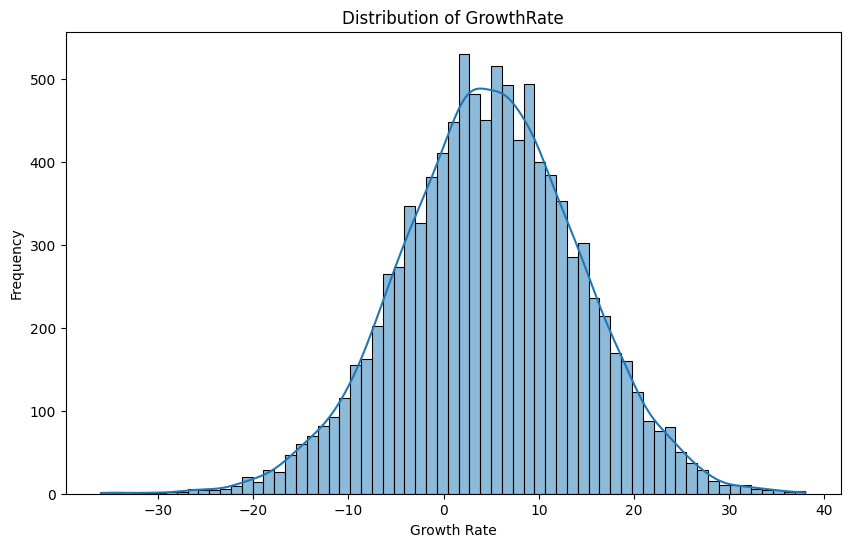

In [ ]:
from scipy import stats

# Drop null values from GrowthRate for the analysis
growth_rate_cleaned = df['GrowthRate'].dropna()

# Perform Shapiro-Wilk Test
shapiro_test = stats.shapiro(growth_rate_cleaned)
print(f"Shapiro-Wilk Test: Statistic={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.4f}")

# Plot Histogram
plt.figure(figsize=(10, 6))
sns.histplot(growth_rate_cleaned, kde=True)
plt.title('Distribution of GrowthRate')
plt.xlabel('Growth Rate')
plt.ylabel('Frequency')
plt.show()

In [ ]:
median_growth_rate = df['GrowthRate'].median()
df['GrowthRate'] = df['GrowthRate'].fillna(median_growth_rate)

print(f"Median Growth Rate used for imputation: {median_growth_rate:.2f}")
print("Null values after imputation:")
print(df['GrowthRate'].isnull().sum())

Median Growth Rate used for imputation: 4.90
Null values after imputation:
0


In [ ]:
df = df.drop(columns=['CompanyID', 'CompanyName'])
print(df.head())

  Industry         Region  Year  Revenue  ProfitMargin  MarketCap  GrowthRate  \
0   Retail  Latin America  2015    459.2           6.0      337.5         4.9   
1   Retail  Latin America  2016    473.8           4.6      366.6         3.2   
2   Retail  Latin America  2017    564.9           5.2      313.4        19.2   
3   Retail  Latin America  2018    558.4           4.3      283.0        -1.1   
4   Retail  Latin America  2019    554.5           4.9      538.1        -0.7   

   ESG_Overall  ESG_Environmental  ESG_Social  ESG_Governance  \
0         57.0               60.7        33.5            76.8   
1         56.7               58.9        32.8            78.5   
2         56.5               57.6        34.0            77.8   
3         58.0               62.3        33.4            78.3   
4         56.6               63.7        30.0            76.1   

   CarbonEmissions  WaterUsage  EnergyConsumption  
0          35577.4     17788.7            71154.7  
1          37314.7

**EDA**

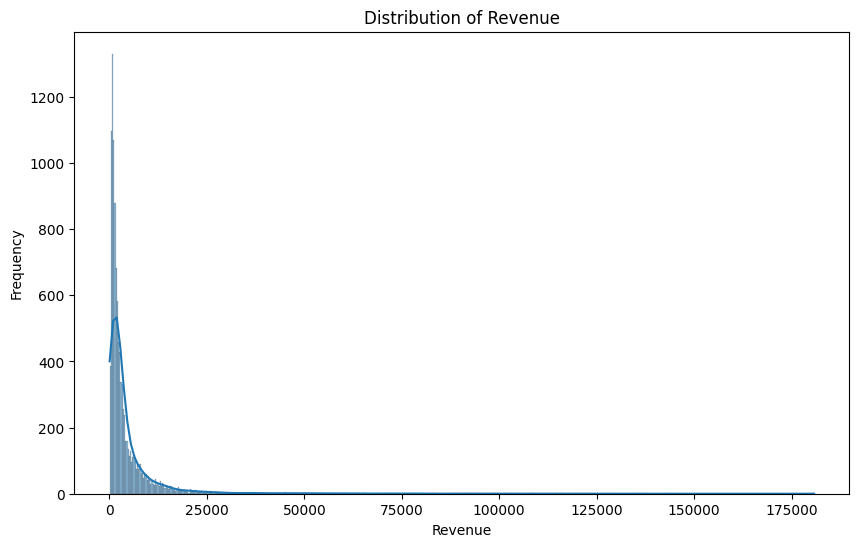

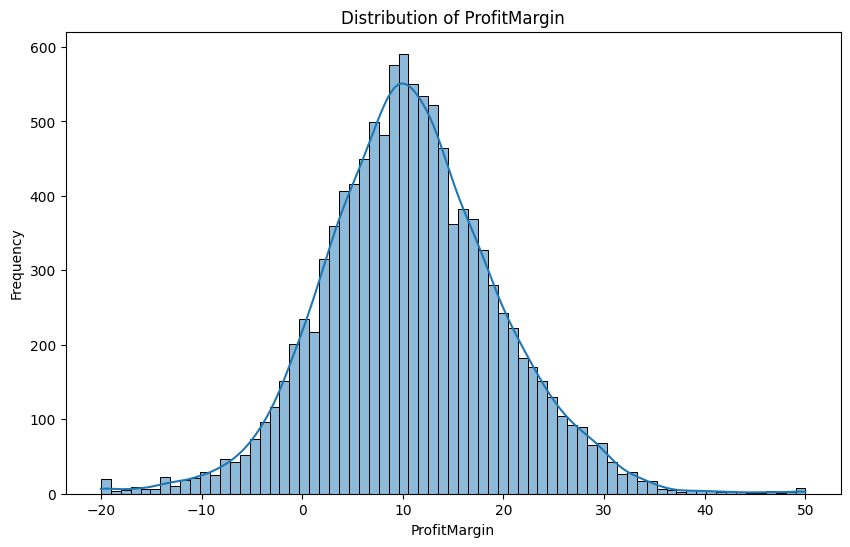

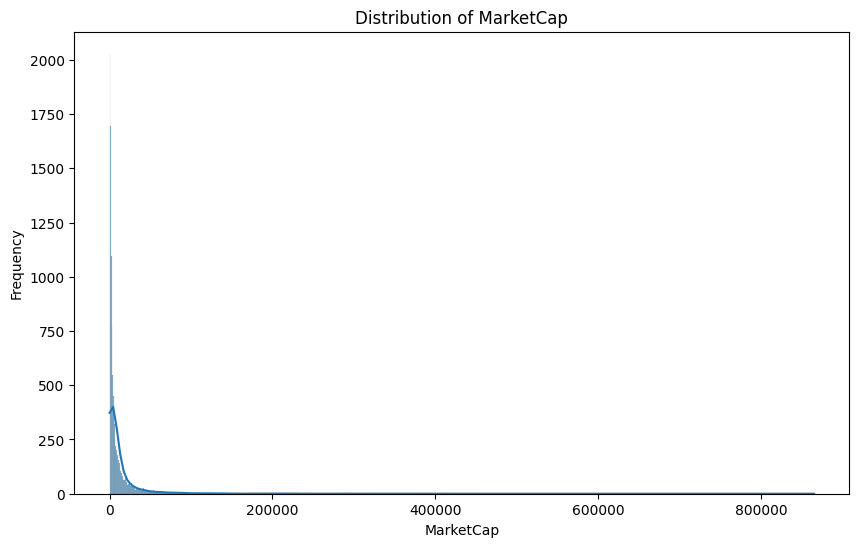

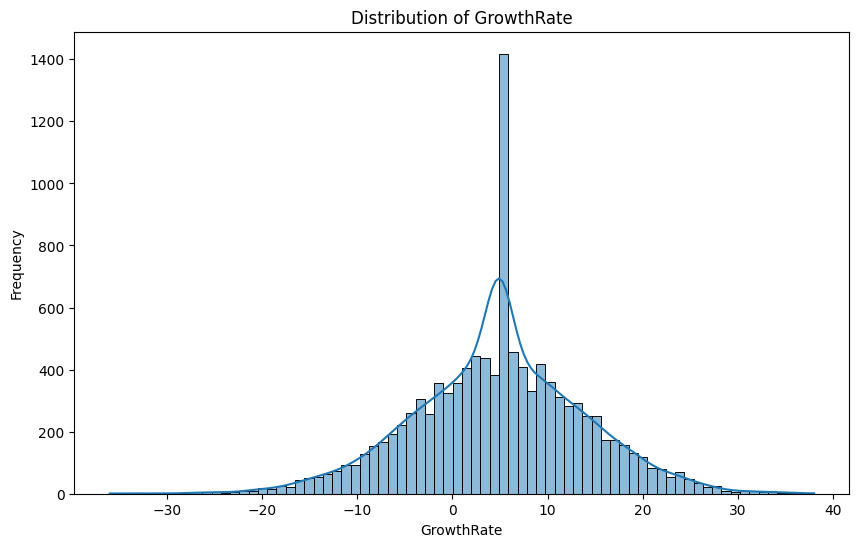

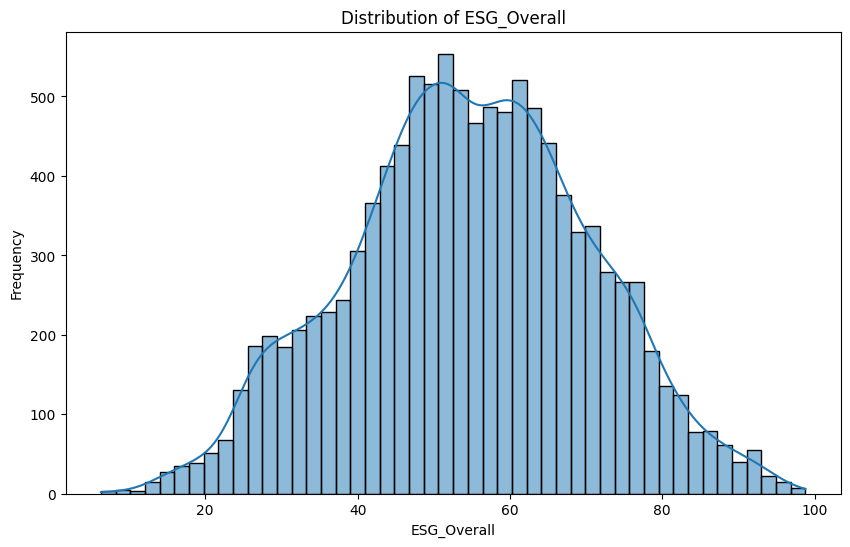

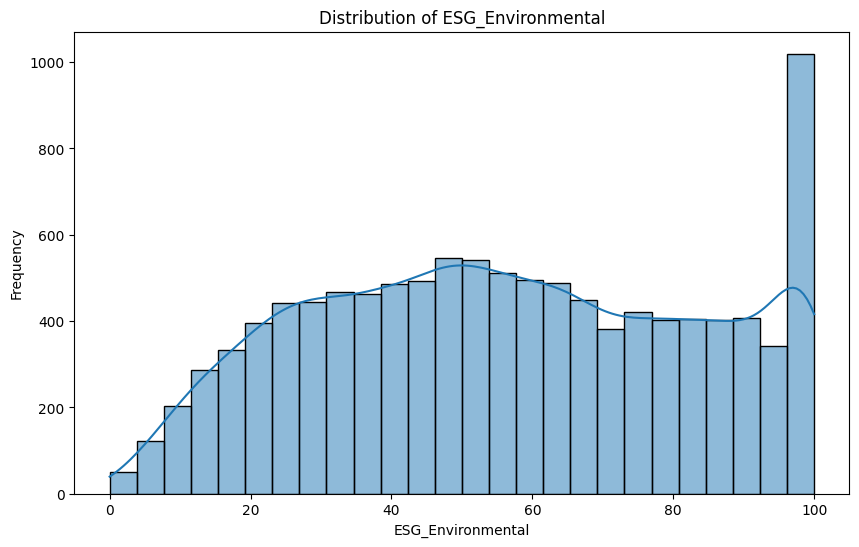

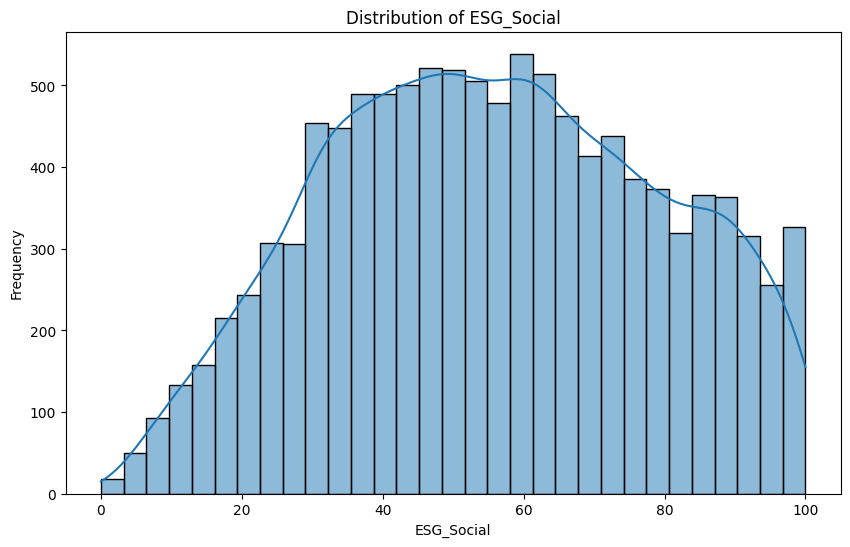

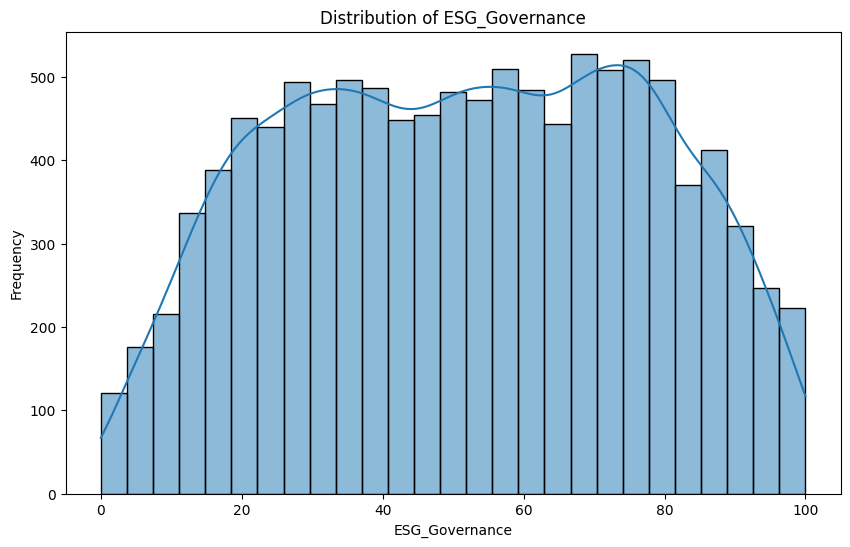

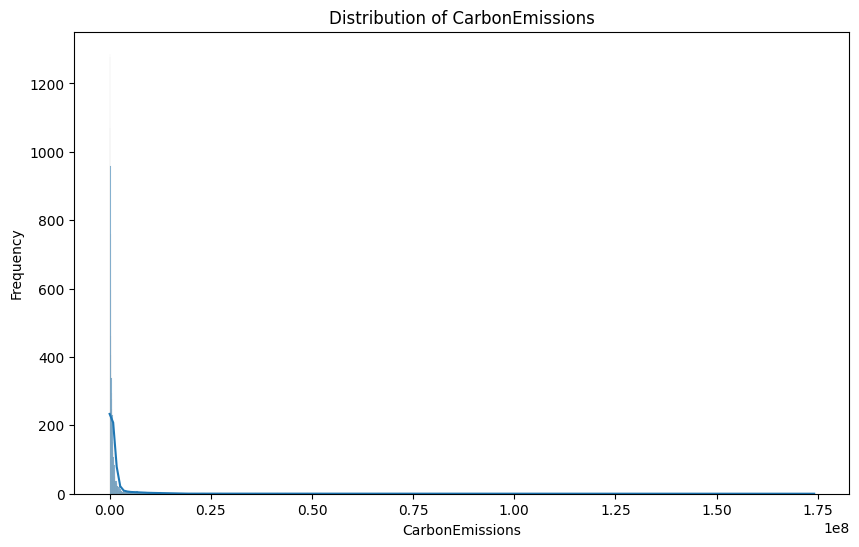

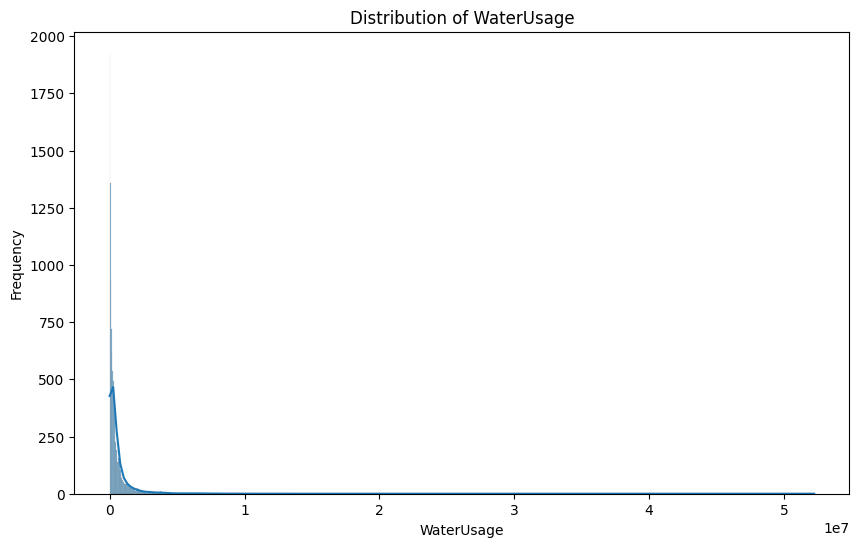

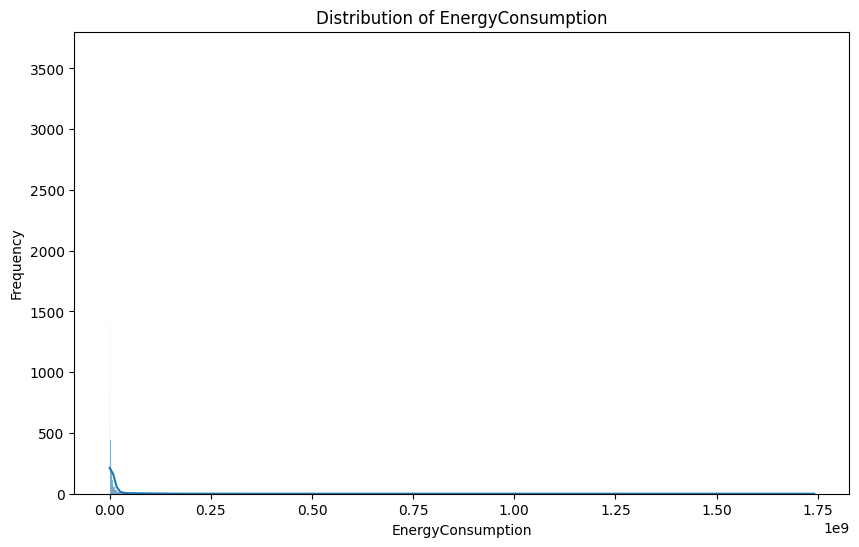

In [ ]:
numerical_cols = ['Revenue', 'ProfitMargin', 'MarketCap', 'GrowthRate', 'ESG_Overall',
                    'ESG_Environmental', 'ESG_Social', 'ESG_Governance', 'CarbonEmissions',
                    'WaterUsage', 'EnergyConsumption']

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

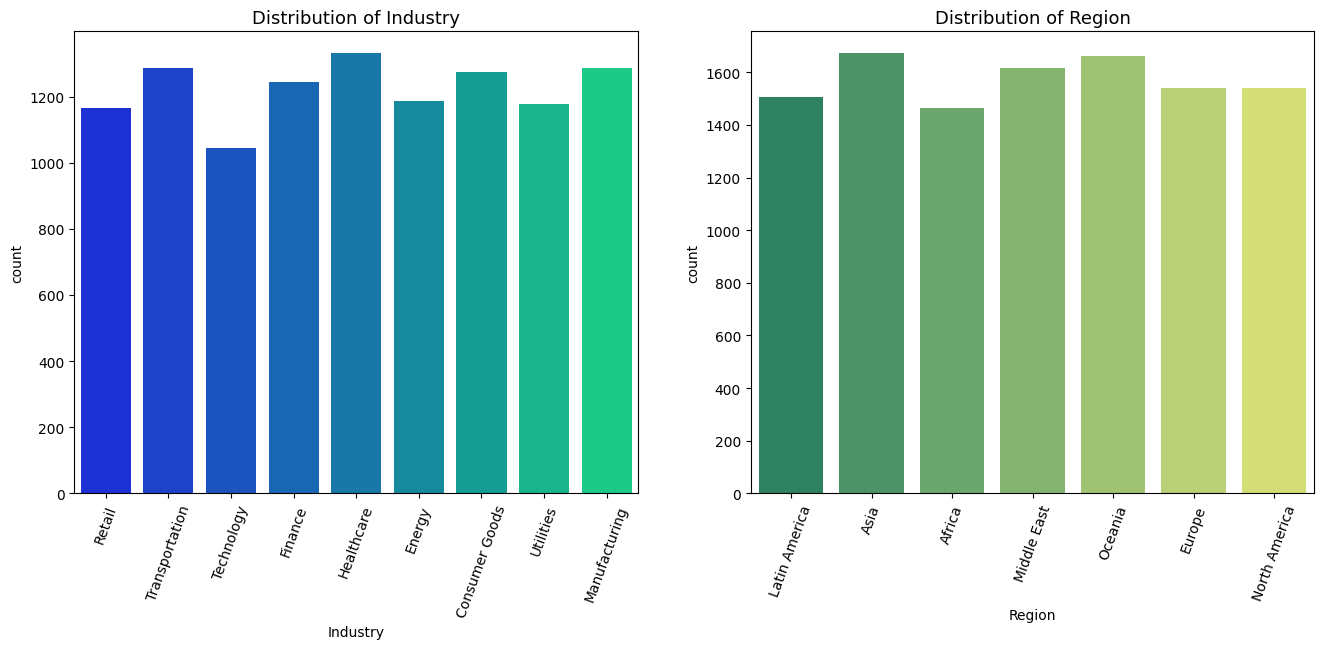

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('Distribution of Industry', fontsize=13)
sns.countplot(x=df['Industry'], hue=df['Industry'], palette='winter', legend=False)
plt.xticks(rotation=70)

plt.subplot(1,2,2)
plt.title('Distribution of Region', fontsize=13)
sns.countplot(x=df['Region'], hue=df['Region'], palette='summer', legend=False)
plt.xticks(rotation=70)
plt.show()

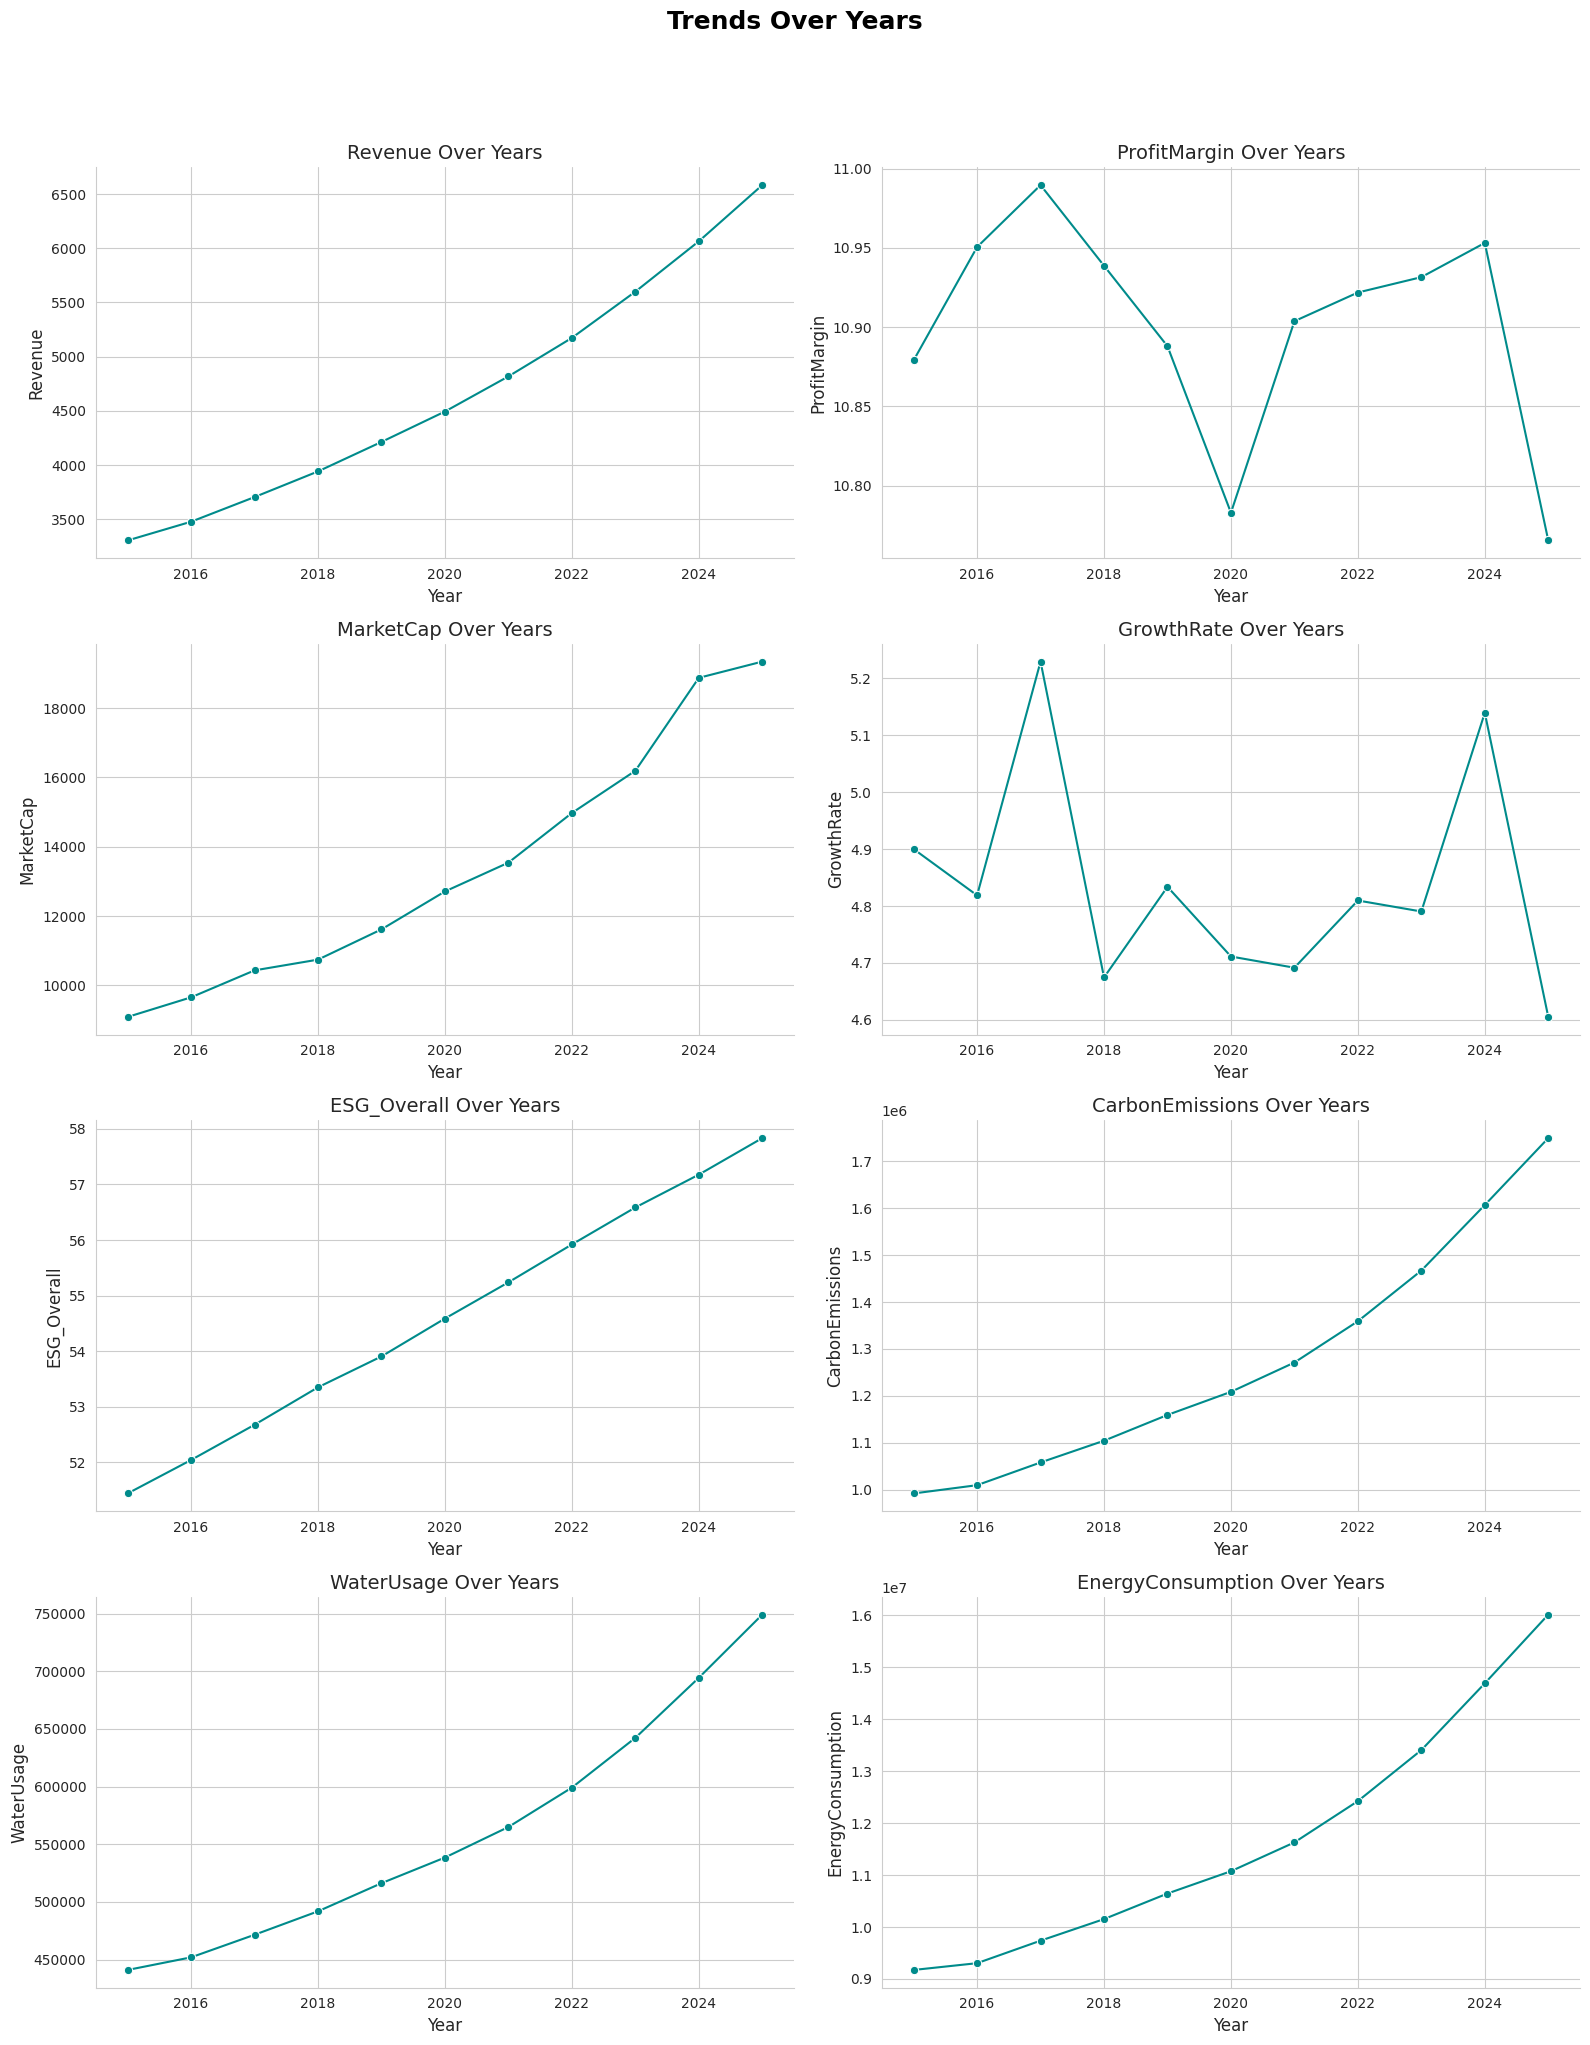

In [ ]:
columns_to_plot = ['Revenue', 'ProfitMargin', 'MarketCap', 'GrowthRate', 'ESG_Overall',"CarbonEmissions", "WaterUsage","EnergyConsumption"]

# Determine number of rows and columns for subplots
num_cols = 2 # Let's aim for 2 columns
num_rows = (len(columns_to_plot) + num_cols - 1) // num_cols

plt.figure(figsize=(num_cols * 8, num_rows * 5))
plt.suptitle('Trends Over Years', fontsize=18, y=1.02, weight='bold') # Make suptitle bold and slightly larger

sns.set_style("whitegrid") # Apply a clean seaborn style

for i, col in enumerate(columns_to_plot):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.lineplot(data=df, x='Year', y=col, estimator='mean', errorbar=None, marker='o', color='darkcyan') # Add markers and set color
    plt.title(f'{col} Over Years', fontsize=14) # Make subplot titles slightly larger
    plt.xlabel('Year', fontsize=12)
    plt.ylabel(col, fontsize=12)
    sns.despine() # Remove top and right spines for a cleaner look

plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent suptitle overlap
plt.show()

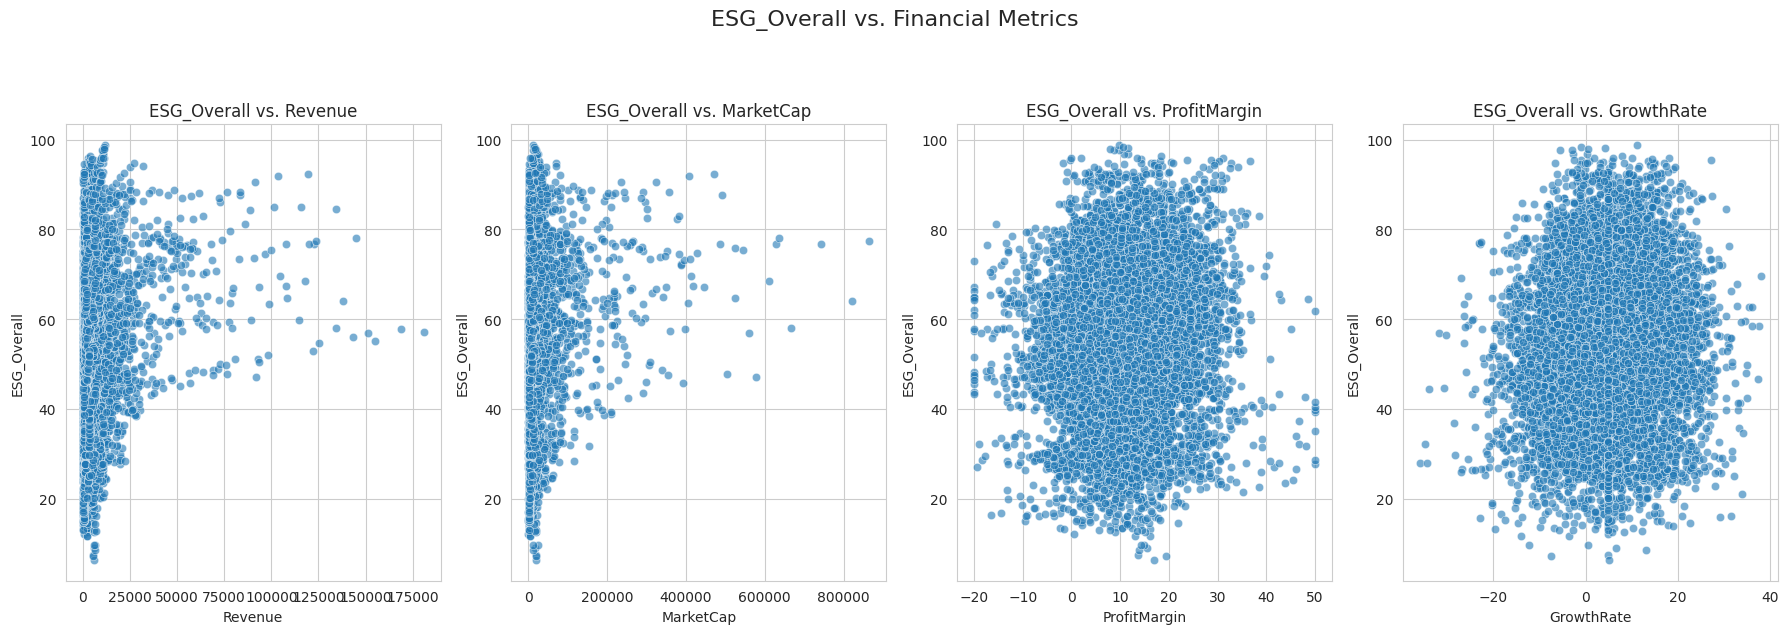

In [ ]:
columns_for_scatter = ['Revenue', 'MarketCap', 'ProfitMargin','GrowthRate']

plt.figure(figsize=(18, 6))
plt.suptitle('ESG_Overall vs. Financial Metrics', fontsize=16, y=1.05)

for i, col in enumerate(columns_for_scatter):
    plt.subplot(1, 4, i + 1) # 1 row, 3 columns
    sns.scatterplot(data=df, x=col, y='ESG_Overall', alpha=0.6)
    plt.title(f'ESG_Overall vs. {col}')
    plt.xlabel(col)
    plt.ylabel('ESG_Overall')
    plt.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent suptitle overlap
plt.show()

**ESG_Overall vs Revenu**

Companies with higher revenue tend to have moderate to high ESG scores, but the relationship is not strongly linear.

Many low-revenue firms show a wide dispersion in ESG performance, indicating that ESG compliance is not solely driven by firm size.

**ESG_Overall vs Market Capitalization**
Comapnies with High Market Cap have moderate to high ESG Score.
Low market cap firms display a wide ESG spread, ranging from poor to strong sustainability performance.

**ESG_Overall vs Profit Margin**
ESG scores remain widely distributed across all profit margin levels indicating no direct one-to-one relationship.
Both profitable and less profitable firms can have high ESG scores.

**ESG_Overall vs Growth Rate**
ESG scores are spread across both high-growth and low-growth companies.
No strong linear trend is visible, indicating that growth dynamics are influenced by multiple factors beyond ESG.


In [ ]:
import numpy as np

def market_cap_category(mcap):
    if mcap < 2000:
        return 'Small Cap'
    elif mcap < 10000:
        return 'Mid Cap'
    else:
        return 'Large Cap'

df['MarketCap_Category'] = df['MarketCap'].apply(market_cap_category)

df['MarketCap_Category'].value_counts()



,count
MarketCap_Category,
Small Cap,4343
Mid Cap,3910
Large Cap,2747


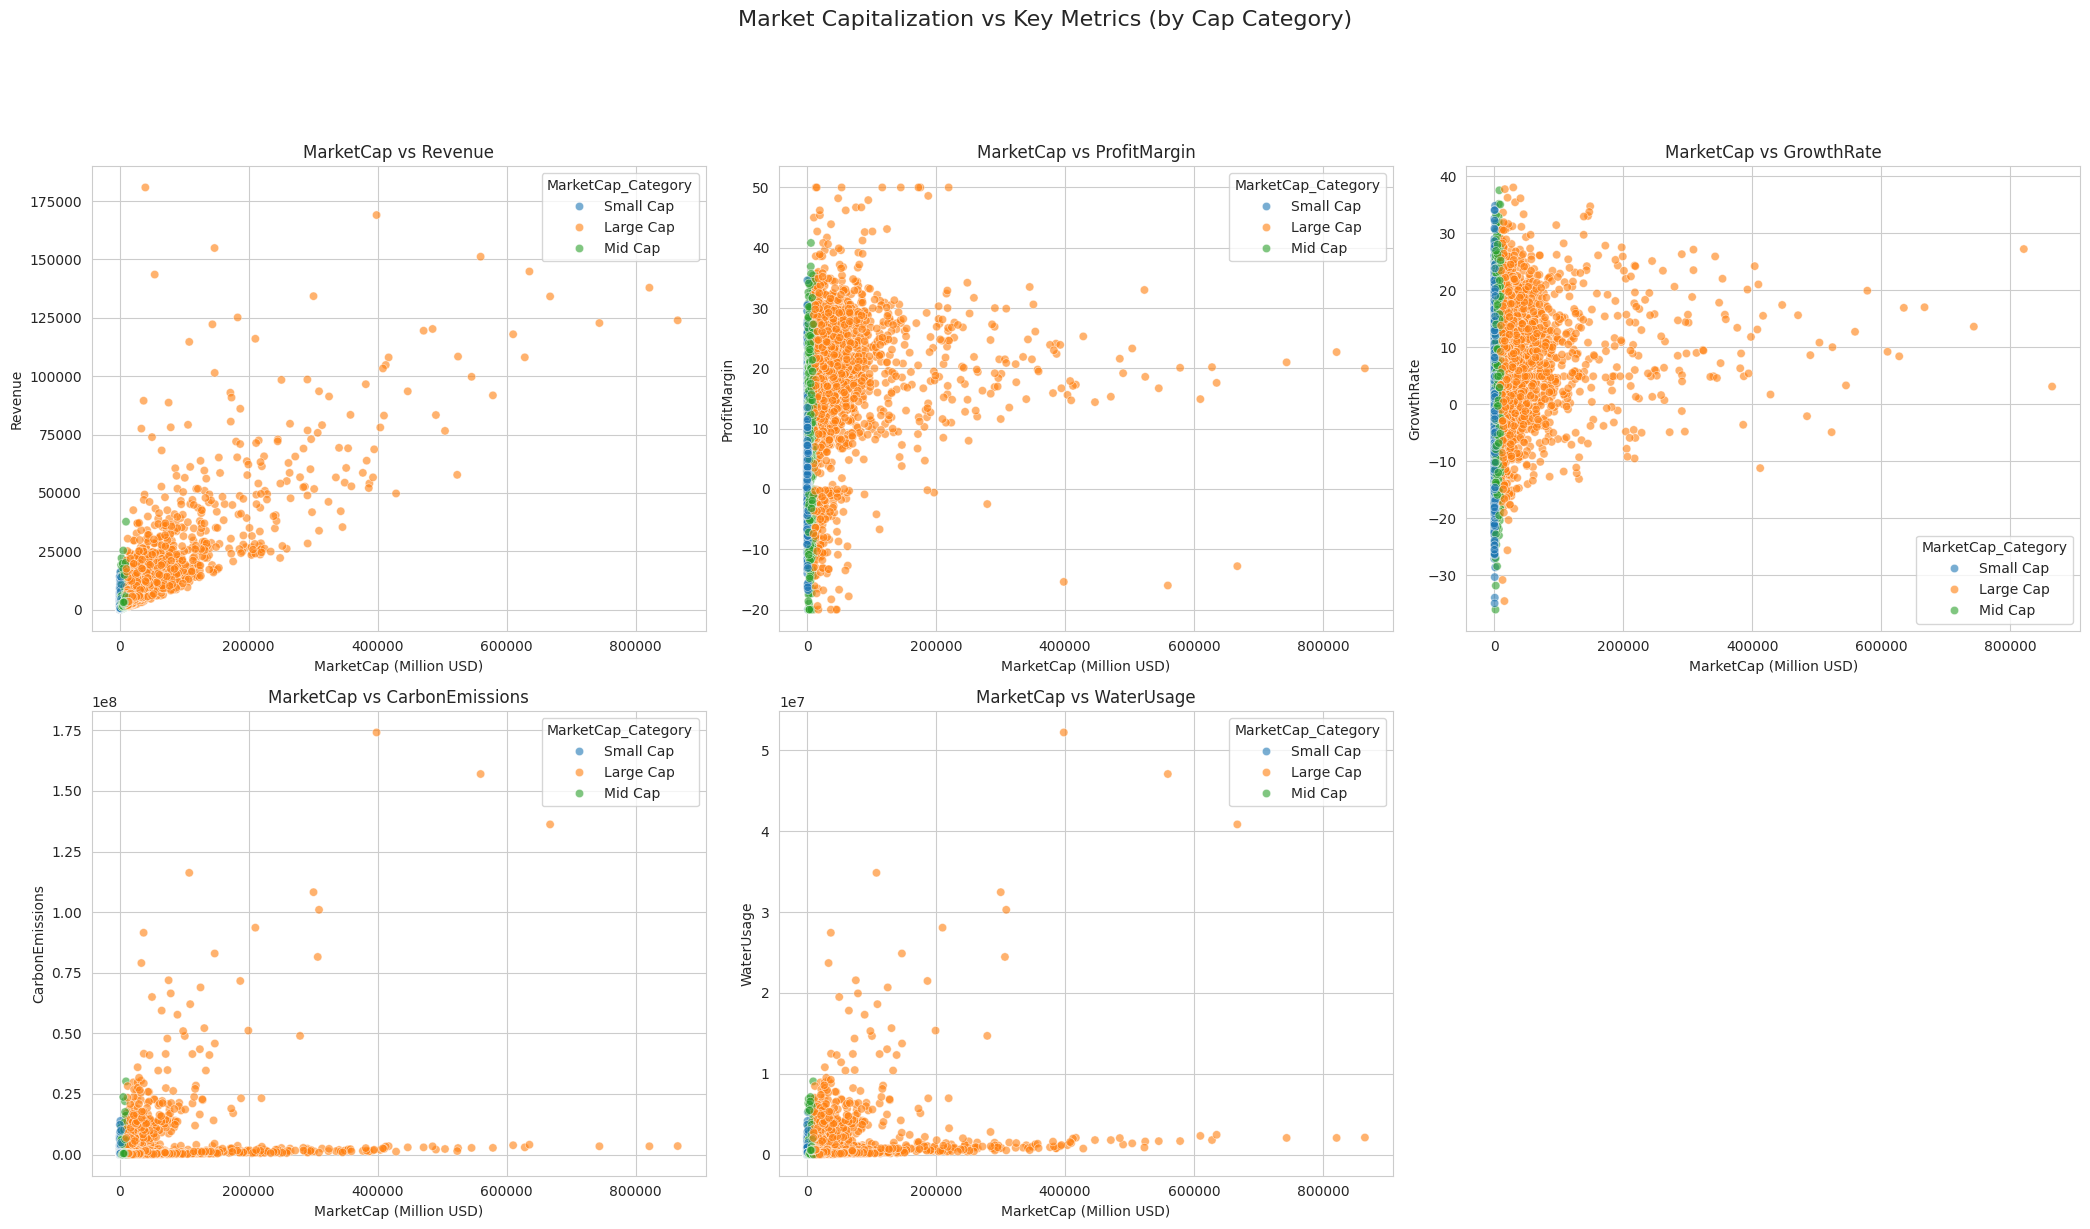

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_for_y_axis = ['Revenue', 'ProfitMargin', 'GrowthRate',
                      'CarbonEmissions', 'WaterUsage']

num_y_cols = len(columns_for_y_axis)
num_cols = 3
num_rows = (num_y_cols + num_cols - 1) // num_cols

plt.figure(figsize=(num_cols * 7, num_rows * 6))
plt.suptitle('Market Capitalization vs Key Metrics (by Cap Category)',
             fontsize=16, y=1.02)

for i, col in enumerate(columns_for_y_axis):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.scatterplot(
        data=df,
        x='MarketCap',
        y=col,
        hue='MarketCap_Category',
        alpha=0.6
    )
    plt.title(f'MarketCap vs {col}')
    plt.xlabel('MarketCap (Million USD)')
    plt.ylabel(col)
    plt.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


**Market Cap vs. Revenue:** Large-cap firms dominate the higher revenue range, indicating a general positive association between revenue scale and market capitalization. However, there is substantial overlap between mid-cap and large-cap firms at similar revenue levels.**Revenue contributes to firm valuation, but it does not solely determine market capitalization.**

**Market Cap vs. Profit Margins:**
Profit margins are widely dispersed across all market-cap categories.
Large-cap firms do not consistently exhibit higher profit margins than mid- or small-cap firms. **Market capitalization is not strongly driven by short-term profitability alone**, suggesting that investors place greater emphasis on scale, stability, and long-term prospects rather than current margins.



**Market Cap vs. Profit Margins:**
Small- and mid-cap firms display higher variability in growth rates, including both high positive and negative growth.
Large-cap firms generally exhibit more stable and moderate growth rate. Large cap tend to prioritize high growth rate.

**Market Cap vs Carbon EMission:** Small& Mid cap are at the lower carbon emission level. Large caps displaying wider dispersion. But for most of large caps carbon emission is lower. **Hence, Carbon emissions do not increase proportionally with market capitalization.**

**Water Usage vs MarketCap:** Small-cap and Mid cap firms cluster at lower water usage levels with limited variation, while large-cap firms show much wider dispersion, including high-usage outliers. Overall, water usage does not increase proportionally with market capitalization.


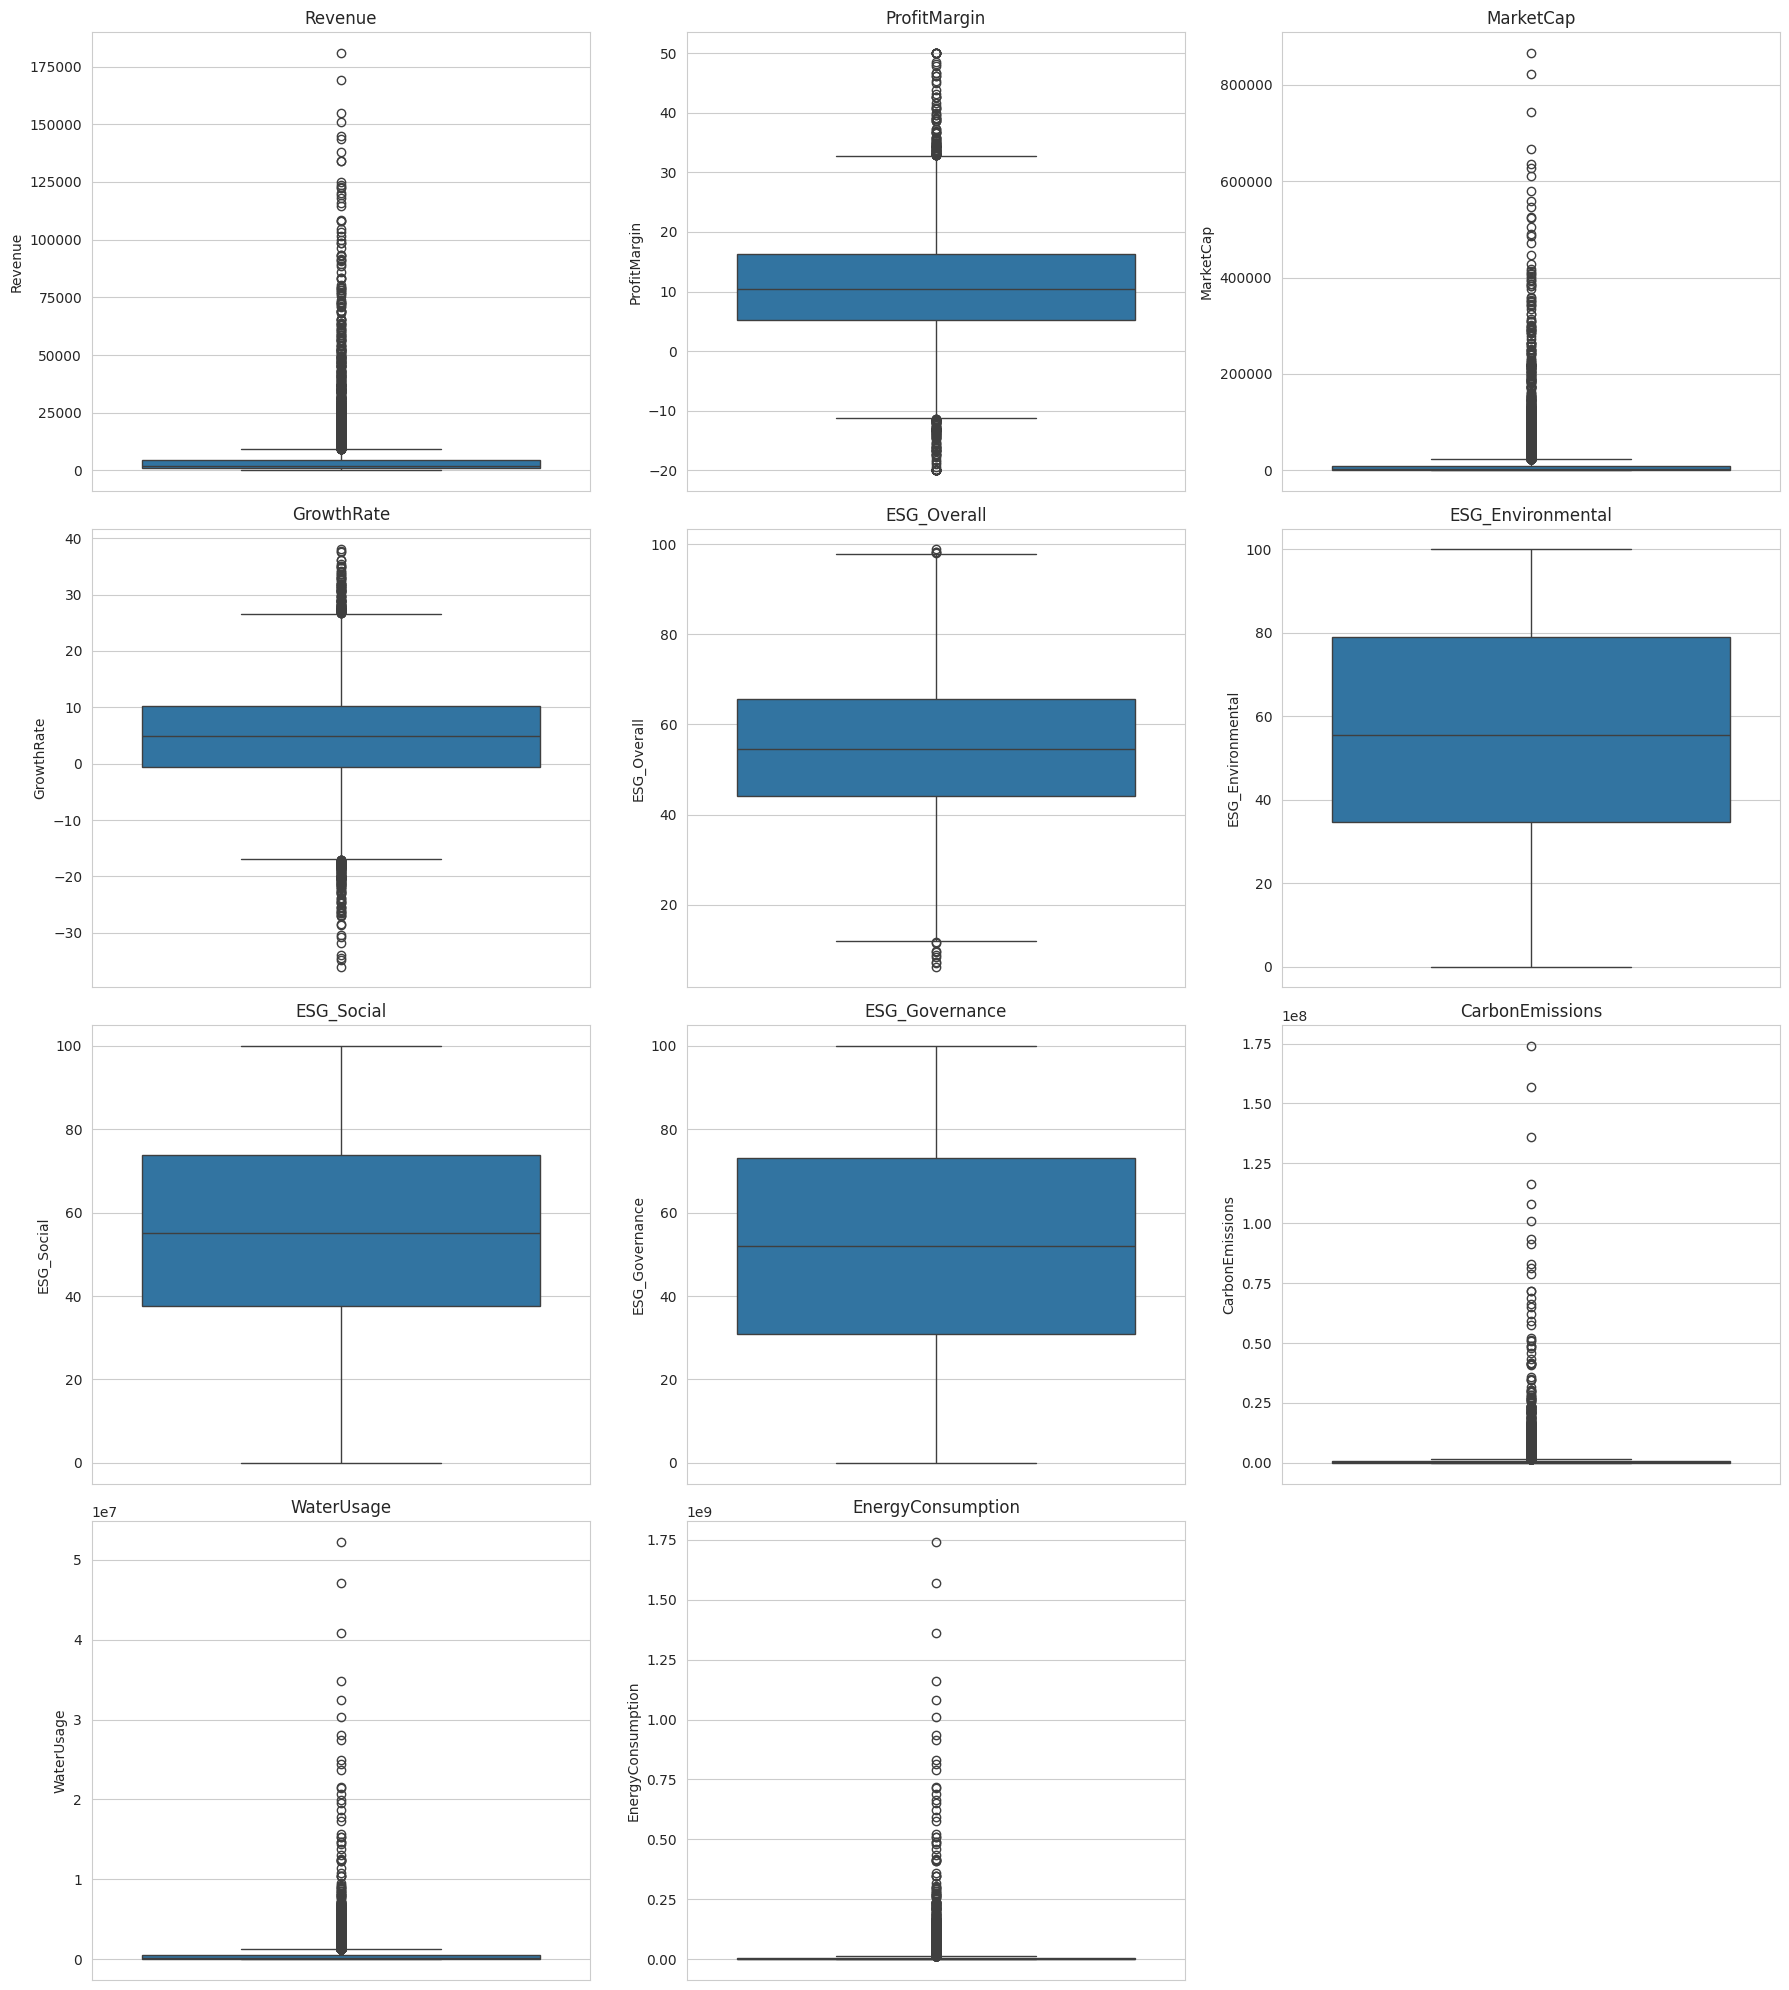

In [ ]:
import seaborn as sns

columns_for_boxplot = [
    'Revenue', 'ProfitMargin', 'MarketCap', 'GrowthRate',
    'ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance',
    'CarbonEmissions', 'WaterUsage', 'EnergyConsumption'
]

plt.figure(figsize=(18, 20))

for i, col in enumerate(columns_for_boxplot):
    plt.subplot(4, 3, i + 1)   # 4 rows, 3 columns
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
from scipy import stats

columns_for_shapiro = [
    'Revenue', 'ProfitMargin', 'MarketCap', 'GrowthRate',
    'ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance',
    'CarbonEmissions', 'WaterUsage', 'EnergyConsumption'
]

print("Shapiro-Wilk Test Results:")
for col in columns_for_shapiro:
    # Drop null values for the test, as Shapiro-Wilk does not handle NaNs
    data_cleaned = df[col].dropna()

    if len(data_cleaned) > 0:
        try:
            shapiro_test = stats.shapiro(data_cleaned)
            print(f"{col}: Statistic={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.4f}")
            if len(data_cleaned) > 5000:
                print(f"  (Note: For {col}, N={len(data_cleaned)} > 5000, p-value may not be accurate.)")
        except Exception as e:
            print(f"{col}: Error during Shapiro-Wilk test - {e}")
    else:
        print(f"{col}: No data available for testing after dropping NaNs.")

Shapiro-Wilk Test Results:
Revenue: Statistic=0.3845, p-value=0.0000
  (Note: For Revenue, N=11000 > 5000, p-value may not be accurate.)
ProfitMargin: Statistic=0.9937, p-value=0.0000
  (Note: For ProfitMargin, N=11000 > 5000, p-value may not be accurate.)
MarketCap: Statistic=0.3022, p-value=0.0000
  (Note: For MarketCap, N=11000 > 5000, p-value may not be accurate.)
GrowthRate: Statistic=0.9943, p-value=0.0000
  (Note: For GrowthRate, N=11000 > 5000, p-value may not be accurate.)
ESG_Overall: Statistic=0.9973, p-value=0.0000
  (Note: For ESG_Overall, N=11000 > 5000, p-value may not be accurate.)
ESG_Environmental: Statistic=0.9637, p-value=0.0000
  (Note: For ESG_Environmental, N=11000 > 5000, p-value may not be accurate.)
ESG_Social: Statistic=0.9818, p-value=0.0000
  (Note: For ESG_Social, N=11000 > 5000, p-value may not be accurate.)
ESG_Governance: Statistic=0.9719, p-value=0.0000
  (Note: For ESG_Governance, N=11000 > 5000, p-value may not be accurate.)
CarbonEmissions: Statisti

/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11000.
  res = hypotest_fun_out(*samples, **kwds)


For every column the p-value is 0.0000 (or extremely close to zero). Leads to the rejection of the null hypothesis. (The null hypothesis for the Shapiro-Wilk test is that the data is normally distributed.)

Therefore, for all these columns, we reject the null hypothesis, indicating that **none of these columns are normally distributed.**Hence outlier treatment using IQR

In [ ]:
def iqr_cap(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)
    return df

cols_to_cap = ['Revenue', 'ProfitMargin', 'MarketCap', 'GrowthRate',
    'ESG_Overall', 'CarbonEmissions',
               'WaterUsage', 'EnergyConsumption']

for col in cols_to_cap:
    df = iqr_cap(df, col)


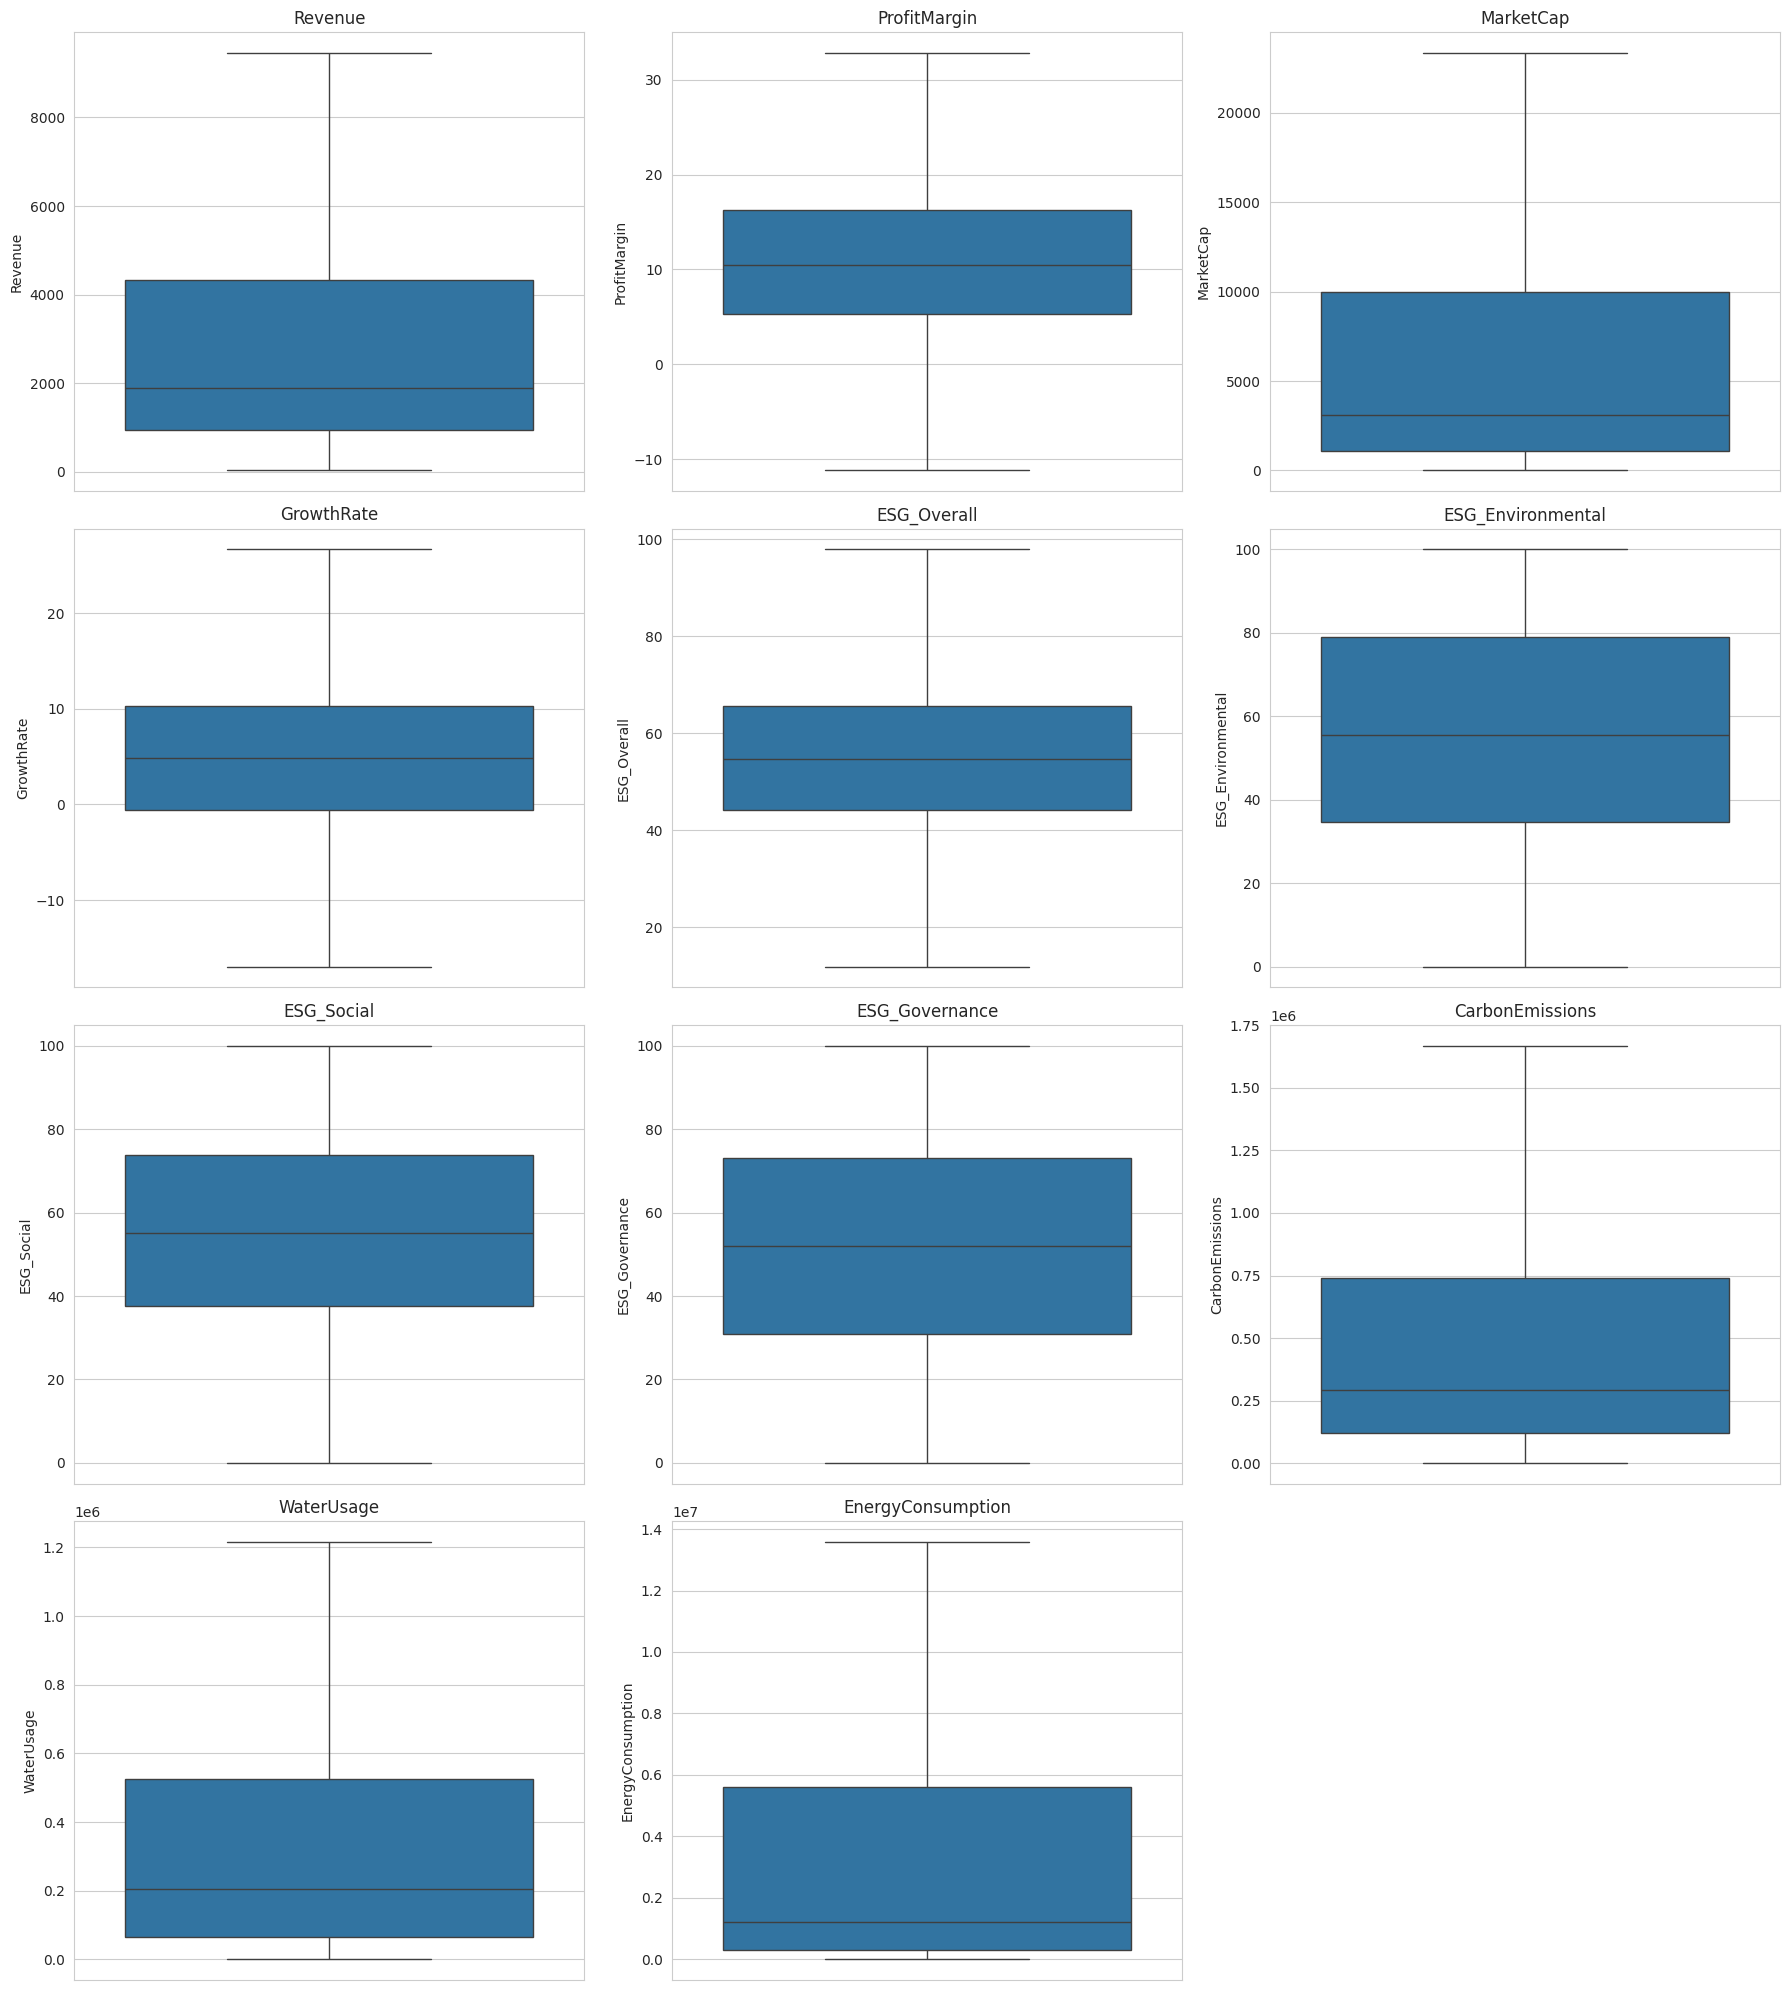

In [ ]:
import seaborn as sns

columns_for_boxplot = [
    'Revenue', 'ProfitMargin', 'MarketCap', 'GrowthRate',
    'ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance',
    'CarbonEmissions', 'WaterUsage', 'EnergyConsumption'
]

plt.figure(figsize=(18, 20))

for i, col in enumerate(columns_for_boxplot):
    plt.subplot(4, 3, i + 1)   # 4 rows, 3 columns
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
industry_counts = df['Industry'].value_counts()
industry_rank = industry_counts.rank(method='dense').astype(int)

df['Industry'] = df['Industry'].map(industry_rank)


In [ ]:

region_counts = df['Region'].value_counts()
region_rank = region_counts.rank(method='dense').astype(int)

df['Region'] = df['Region'].map(region_rank)
df.head()


,Industry,Region,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption,MarketCap_Category
0,2,2,2015,459.2,6.0,337.5,4.9,57.0,60.7,33.5,76.8,35577.4,17788.7,71154.7,Small Cap
1,2,2,2016,473.8,4.6,366.6,3.2,56.7,58.9,32.8,78.5,37314.7,18657.4,74629.4,Small Cap
2,2,2,2017,564.9,5.2,313.4,19.2,56.5,57.6,34.0,77.8,45006.4,22503.2,90012.9,Small Cap
3,2,2,2018,558.4,4.3,283.0,-1.1,58.0,62.3,33.4,78.3,42650.1,21325.1,85300.2,Small Cap
4,2,2,2019,554.5,4.9,538.1,-0.7,56.6,63.7,30.0,76.1,41799.4,20899.7,83598.8,Small Cap


## **Model Training**: Predict Market Cap

## **MLR**

In [ ]:
y = df['MarketCap']
X = df.drop(columns=['MarketCap', 'MarketCap_Category'])
y = np.log(df['MarketCap'])


print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
print("\nFirst 5 rows of X:")
print(X.head())
print("\nFirst 5 values of y:")
print(y.head())

Shape of X: (11000, 13)
Shape of y: (11000,)

First 5 rows of X:
   Industry  Region  Year  Revenue  ProfitMargin  GrowthRate  ESG_Overall  \
0         2       2  2015    459.2           6.0         4.9         57.0   
1         2       2  2016    473.8           4.6         3.2         56.7   
2         2       2  2017    564.9           5.2        19.2         56.5   
3         2       2  2018    558.4           4.3        -1.1         58.0   
4         2       2  2019    554.5           4.9        -0.7         56.6   

   ESG_Environmental  ESG_Social  ESG_Governance  CarbonEmissions  WaterUsage  \
0               60.7        33.5            76.8          35577.4     17788.7   
1               58.9        32.8            78.5          37314.7     18657.4   
2               57.6        34.0            77.8          45006.4     22503.2   
3               62.3        33.4            78.3          42650.1     21325.1   
4               63.7        30.0            76.1          41799.4  

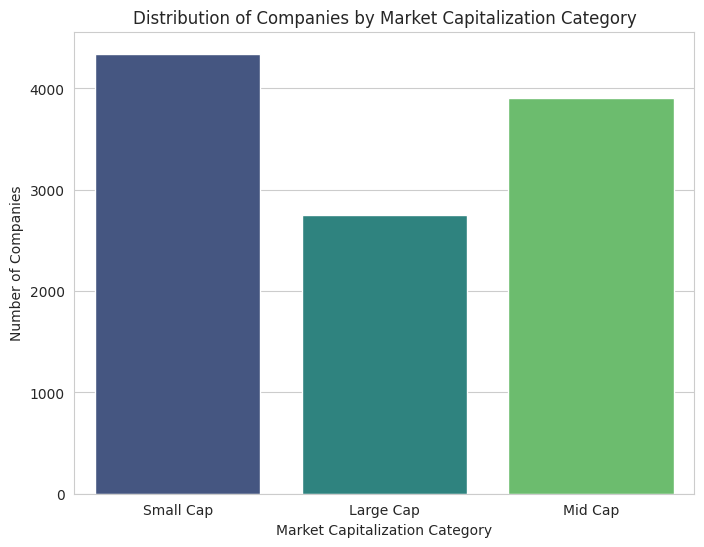

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='MarketCap_Category', hue='MarketCap_Category', palette='viridis', legend=False)
plt.title('Distribution of Companies by Market Capitalization Category')
plt.xlabel('Market Capitalization Category')
plt.ylabel('Number of Companies')
plt.show()

The dataset is dominated by small-cap and mid-cap companies, indicating a stronger representation of smaller and mid-sized firms compared to large-cap firms.

Large-cap companies form the smallest group, suggesting that very high-valuation firms are relatively fewer in the sample.

This distribution implies that the analysis largely reflects the behavior and characteristics of non-large-cap firms, which is important while interpreting valuation and ESG relationships.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (8800, 13)
Shape of X_test: (2200, 13)
Shape of y_train: (8800,)
Shape of y_test: (2200,)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Scaling the data
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames for easier inspection and to retain column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Add a constant (intercept) to the independent variables for statsmodels
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

# Create and fit the OLS model
model = sm.OLS(y_train, X_train_scaled)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              MarketCap   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     1330.
Date:                Sun, 04 Jan 2026   Prob (F-statistic):               0.00
Time:                        09:20:28   Log-Likelihood:                -11095.
No. Observations:                8800   AIC:                         2.222e+04
Df Residuals:                    8786   BIC:                         2.232e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 8.0164      0.00

The model explains about 66% of the variation in market capitalization, indicating strong overall fit.

Revenue, profit margin, and growth rate are the most influential predictors of firm valuation.

ESG sub-components show limited individual significance, suggesting overlap among ESG measures.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Drop the 'const' column for VIF calculation as it's not an independent variable
X_vif = X_train_scaled.drop(columns=['const'])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print("\nVariance Inflation Factor (VIF) for each feature:")
print(vif_data.sort_values(by='VIF', ascending=False))


Variance Inflation Factor (VIF) for each feature:
              feature           VIF
6         ESG_Overall  37985.613006
7   ESG_Environmental  11819.308563
9      ESG_Governance  10571.973381
8          ESG_Social   9016.975590
12  EnergyConsumption      7.705838
11         WaterUsage      6.599678
10    CarbonEmissions      6.184327
3             Revenue      2.493813
0            Industry      1.175616
4        ProfitMargin      1.122220
5          GrowthRate      1.069238
2                Year      1.037031
1              Region      1.033204


In [ ]:
high_vif_features = vif_data[vif_data['VIF'] > 7]['feature'].tolist()

print("Features with VIF greater than 7:")
print(high_vif_features)

Features with VIF greater than 7:
['ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance', 'EnergyConsumption']


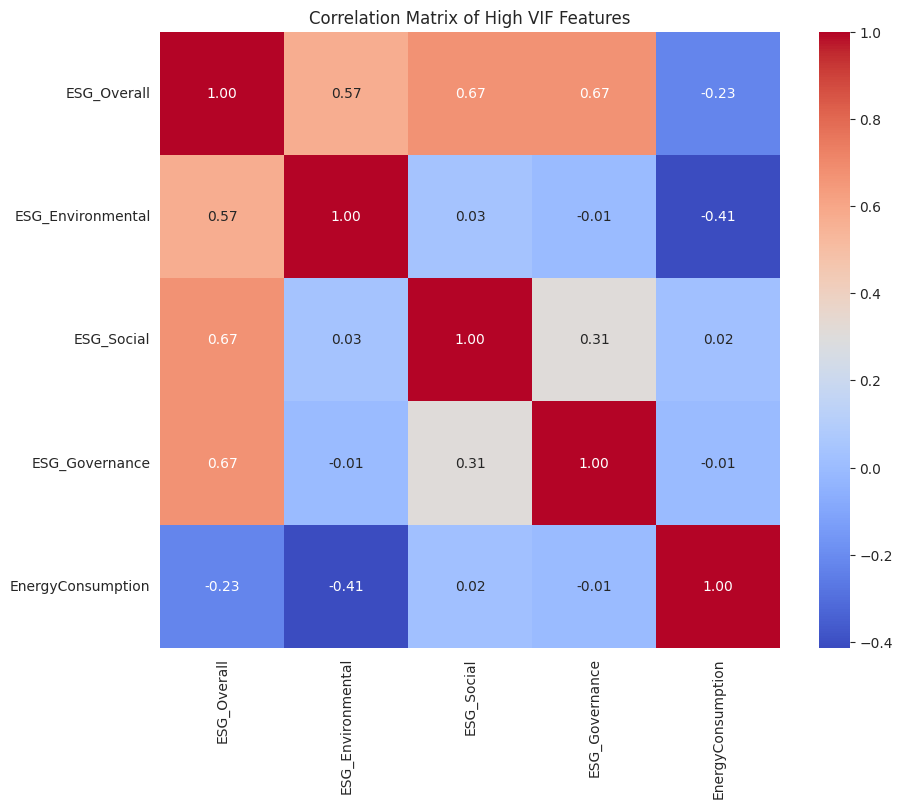

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_train_scaled[high_vif_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of High VIF Features')
plt.show()

ESG sub-components are strongly correlated with ESG Overall, indicating overlapping information among ESG measures.

This high correlation explains the multicollinearity issue observed in the regression model.

Retaining a single ESG indicator is therefore more appropriate for stable modeling.

In [ ]:
drop_vars = [
    'ESG_Environmental',
    'ESG_Social',
    'ESG_Governance' # high VIF + weak significance
]


In [ ]:
X_train_reduced = X_train_scaled.drop(columns=drop_vars)
X_test_reduced = X_test_scaled.drop(columns=drop_vars)

print(f"Shape of X_train_reduced: {X_train_reduced.shape}")
print(f"Shape of X_test_reduced: {X_test_reduced.shape}")
print("\nFirst 5 rows of X_train_reduced:")
print(X_train_reduced.head())

Shape of X_train_reduced: (8800, 11)
Shape of X_test_reduced: (2200, 11)

First 5 rows of X_train_reduced:
       const  Industry    Region      Year   Revenue  ProfitMargin  \
10735    1.0 -0.847217 -1.579593  1.587346 -0.657942      0.799816   
5937     1.0 -0.847217  0.933591  0.953042 -0.431420     -0.355849   
7642     1.0  0.914586 -0.951297  0.953042 -0.784475     -0.544529   
3328     1.0 -0.406766  0.933591  0.318738 -0.636165      2.191330   
8681     1.0  0.033684 -0.951297 -0.949871  1.424040      1.471988   

       GrowthRate  ESG_Overall  CarbonEmissions  WaterUsage  EnergyConsumption  
10735   -1.157949    -1.692190         0.878712    0.656132           1.298626  
5937    -0.029871     1.229816         0.857581    0.637991           1.274935  
7642    -1.055397     0.074750        -0.608806   -0.264952          -0.095682  
3328    -2.343001     0.287032         1.412154    0.048641           1.896683  
8681    -0.611002    -0.100071        -0.798601   -0.813966        

In [ ]:
import statsmodels.api as sm

# Create and fit the OLS model with reduced features
model_reduced = sm.OLS(y_train, X_train_reduced)
results_reduced = model_reduced.fit()

# Print the summary of the new regression results
print(results_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:              MarketCap   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     1665.
Date:                Sun, 04 Jan 2026   Prob (F-statistic):               0.00
Time:                        09:20:31   Log-Likelihood:                -11207.
No. Observations:                8800   AIC:                         2.244e+04
Df Residuals:                    8789   BIC:                         2.251e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 8.0164      0.00

The refined model maintains a strong fit (R² ≈ 0.65) even after removing highly correlated variables.

Revenue, profit margin, growth rate, and ESG Overall remain statistically significant drivers of market capitalization.

Resource usage variables show limited impact, indicating that firm valuation is influenced more by financial strength and overall ESG performance than by individual consumption metrics.

In [ ]:
drop_vars = [
    'ESG_Environmental',
    'ESG_Social',
    'ESG_Governance',
    'EnergyConsumption' # Added based on high VIF and potential redundancy
]

print(f"Updated drop_vars: {drop_vars}")

Updated drop_vars: ['ESG_Environmental', 'ESG_Social', 'ESG_Governance', 'EnergyConsumption']


In [ ]:
X_train_reduced = X_train_scaled.drop(columns=drop_vars)
X_test_reduced = X_test_scaled.drop(columns=drop_vars)

print(f"Shape of X_train_reduced: {X_train_reduced.shape}")
print(f"Shape of X_test_reduced: {X_test_reduced.shape}")
print("\nFirst 5 rows of X_train_reduced:")
print(X_train_reduced.head())

Shape of X_train_reduced: (8800, 10)
Shape of X_test_reduced: (2200, 10)

First 5 rows of X_train_reduced:
       const  Industry    Region      Year   Revenue  ProfitMargin  \
10735    1.0 -0.847217 -1.579593  1.587346 -0.657942      0.799816   
5937     1.0 -0.847217  0.933591  0.953042 -0.431420     -0.355849   
7642     1.0  0.914586 -0.951297  0.953042 -0.784475     -0.544529   
3328     1.0 -0.406766  0.933591  0.318738 -0.636165      2.191330   
8681     1.0  0.033684 -0.951297 -0.949871  1.424040      1.471988   

       GrowthRate  ESG_Overall  CarbonEmissions  WaterUsage  
10735   -1.157949    -1.692190         0.878712    0.656132  
5937    -0.029871     1.229816         0.857581    0.637991  
7642    -1.055397     0.074750        -0.608806   -0.264952  
3328    -2.343001     0.287032         1.412154    0.048641  
8681    -0.611002    -0.100071        -0.798601   -0.813966  


In [ ]:
import statsmodels.api as sm

# Create and fit the OLS model with further reduced features
model_further_reduced = sm.OLS(y_train, X_train_reduced)
results_further_reduced = model_further_reduced.fit()

# Print the summary of the new regression results
print(results_further_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:              MarketCap   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     1850.
Date:                Sun, 04 Jan 2026   Prob (F-statistic):               0.00
Time:                        09:20:34   Log-Likelihood:                -11207.
No. Observations:                8800   AIC:                         2.243e+04
Df Residuals:                    8790   BIC:                         2.250e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               8.0164      0.009    8

In [ ]:
drop_vars = [
    'ESG_Environmental',
    'ESG_Social',
    'ESG_Governance',
    'EnergyConsumption',
    'Region',
    'CarbonEmissions'
]

print(f"Updated drop_vars: {drop_vars}")

Updated drop_vars: ['ESG_Environmental', 'ESG_Social', 'ESG_Governance', 'EnergyConsumption', 'Region', 'CarbonEmissions']


In [ ]:
X_train_reduced = X_train_scaled.drop(columns=drop_vars)
X_test_reduced = X_test_scaled.drop(columns=drop_vars)

print(f"Shape of X_train_reduced: {X_train_reduced.shape}")
print(f"Shape of X_test_reduced: {X_test_reduced.shape}")
print("\nFirst 5 rows of X_train_reduced:")
print(X_train_reduced.head())

Shape of X_train_reduced: (8800, 8)
Shape of X_test_reduced: (2200, 8)

First 5 rows of X_train_reduced:
       const  Industry      Year   Revenue  ProfitMargin  GrowthRate  \
10735    1.0 -0.847217  1.587346 -0.657942      0.799816   -1.157949   
5937     1.0 -0.847217  0.953042 -0.431420     -0.355849   -0.029871   
7642     1.0  0.914586  0.953042 -0.784475     -0.544529   -1.055397   
3328     1.0 -0.406766  0.318738 -0.636165      2.191330   -2.343001   
8681     1.0  0.033684 -0.949871  1.424040      1.471988   -0.611002   

       ESG_Overall  WaterUsage  
10735    -1.692190    0.656132  
5937      1.229816    0.637991  
7642      0.074750   -0.264952  
3328      0.287032    0.048641  
8681     -0.100071   -0.813966  


In [ ]:
import statsmodels.api as sm

# Create and fit the OLS model with further reduced features
model_further_reduced = sm.OLS(y_train, X_train_reduced)
results_further_reduced = model_further_reduced.fit()

# Print the summary of the new regression results
print(results_further_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:              MarketCap   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     2378.
Date:                Sun, 04 Jan 2026   Prob (F-statistic):               0.00
Time:                        09:20:34   Log-Likelihood:                -11208.
No. Observations:                8800   AIC:                         2.243e+04
Df Residuals:                    8792   BIC:                         2.249e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            8.0164      0.009    869.251   

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set using the refined model
y_pred_final = results_further_reduced.predict(X_test_reduced)

# Calculate evaluation metrics
mae_final = mean_absolute_error(y_test, y_pred_final)
mse_final = mean_squared_error(y_test, y_pred_final)
rmse_final = np.sqrt(mse_final)
r2_final = r2_score(y_test, y_pred_final)

print(f"Final Model Evaluation Metrics:\n")
print(f"Mean Absolute Error (MAE): {mae_final:.4f}")
print(f"Mean Squared Error (MSE): {mse_final:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_final:.4f}")
print(f"R-squared (R2): {r2_final:.4f}")

Final Model Evaluation Metrics:

Mean Absolute Error (MAE): 0.6452
Mean Squared Error (MSE): 0.7833
Root Mean Squared Error (RMSE): 0.8851
R-squared (R2): 0.6483


# **Linear, Ridge, Lasso**

In [ ]:
y = np.log(df['MarketCap'])
X = df.drop([
    'MarketCap',
    'ESG_Environmental',
    'ESG_Social',
    'ESG_Governance',
    'MarketCap_Category' # Drop the categorical column
], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=10),
    "Lasso": Lasso(alpha=0.1) # Adjusted alpha for Lasso for better performance in a typical scenario
}

results = {}

for name, model in models.items():
    print(f"\n--- Training {name} Model ---")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R2): {r2:.4f}")

print("\n--- Model Comparison ---")
for name, metrics in results.items():
    print(f"{name}: R2={metrics['R2']:.4f}, RMSE={metrics['RMSE']:.4f}")


--- Training Linear Model ---
Mean Absolute Error (MAE): 0.6455
Mean Squared Error (MSE): 0.7833
Root Mean Squared Error (RMSE): 0.8850
R-squared (R2): 0.6483

--- Training Ridge Model ---
Mean Absolute Error (MAE): 0.6456
Mean Squared Error (MSE): 0.7834
Root Mean Squared Error (RMSE): 0.8851
R-squared (R2): 0.6483

--- Training Lasso Model ---
Mean Absolute Error (MAE): 0.6613
Mean Squared Error (MSE): 0.8088
Root Mean Squared Error (RMSE): 0.8993
R-squared (R2): 0.6369

--- Model Comparison ---
Linear: R2=0.6483, RMSE=0.8850
Ridge: R2=0.6483, RMSE=0.8851
Lasso: R2=0.6369, RMSE=0.8993


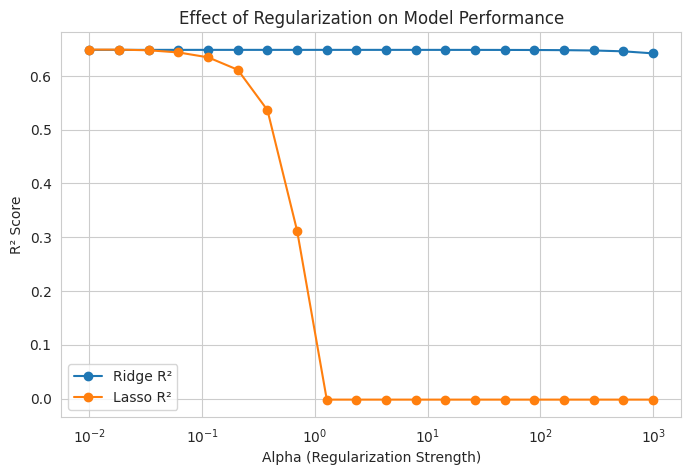

In [ ]:
alphas = np.logspace(-2, 3, 20)
ridge_scores, lasso_scores = [], []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_scaled, y_train)
    ridge_scores.append(ridge.score(X_test_scaled, y_test))

    lasso = Lasso(alpha=a, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)
    lasso_scores.append(lasso.score(X_test_scaled, y_test))

plt.figure(figsize=(8,5))
plt.plot(alphas, ridge_scores, label='Ridge R²', marker='o')
plt.plot(alphas, lasso_scores, label='Lasso R²', marker='o')
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('R² Score')
plt.title('Effect of Regularization on Model Performance')
plt.legend()
plt.show()

**Interpretation: Effect of Regularization on Model Performance**

The x-axis represents the regularization strength (alpha), and the y-axis represents the R² score.

At low values of alpha, both Ridge and Lasso regression show high R², behaving similarly to standard linear regression.

Ridge regression maintains a stable and high R² score across increasing values of alpha.This indicates that Ridge regression is robust to stronger regularization and effectively handles multicollinearity.

**Lasso regression shows a sharp decline in R² as alpha increases**.

At higher alpha values, Lasso’s R² drops to zero, **indicating severe underfitting.**This occurs because Lasso forces many coefficients to become exactly zero, eliminating important correlated features.

The results suggest that Lasso is highly sensitive to regularization strength in this dataset.



# **Pipeline**

In [ ]:
y = df['MarketCap']
X = df.drop(columns=['MarketCap', 'MarketCap_Category','ESG_Environmental',
    'ESG_Social',
    'ESG_Governance'])
y = np.log(df['MarketCap'])



print(y.head())
print(X.head())

0    5.821566
1    5.904271
2    5.747480
3    5.645447
4    6.288044
Name: MarketCap, dtype: float64
   Industry  Region  Year  Revenue  ProfitMargin  GrowthRate  ESG_Overall  \
0         2       2  2015    459.2           6.0         4.9         57.0   
1         2       2  2016    473.8           4.6         3.2         56.7   
2         2       2  2017    564.9           5.2        19.2         56.5   
3         2       2  2018    558.4           4.3        -1.1         58.0   
4         2       2  2019    554.5           4.9        -0.7         56.6   

   CarbonEmissions  WaterUsage  EnergyConsumption  
0          35577.4     17788.7            71154.7  
1          37314.7     18657.4            74629.4  
2          45006.4     22503.2            90012.9  
3          42650.1     21325.1            85300.2  
4          41799.4     20899.7            83598.8  


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Decision Tree Pipeline**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor

dt_pipe = Pipeline([
    ('model', DecisionTreeRegressor(
        max_depth=5,
        random_state=42
    ))
])


# **Random Tree Pipeline**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_pipe = Pipeline([
    ('model', RandomForestRegressor(
        n_estimators=200,
        max_depth=None,
        random_state=42
    ))
])


# **Gradient Boosting Regressor Pipeline**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_pipe = Pipeline([
    ('model', GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    ))
])


# **XGBoost Regressor Pipeline**

In [ ]:
from xgboost import XGBRegressor

xgb_pipe = Pipeline([
    ('model', XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='reg:squarederror',
        random_state=42
    ))
])


# **Model Evealuation**

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd

models = {
    "Decision Tree": dt_pipe,
    "Random Forest": rf_pipe,
    "Gradient Boosting": gb_pipe,
    # "AdaBoost": ada_pipe,  # optional
    "XGBoost": xgb_pipe
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        "R2": r2_score(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAE": mean_absolute_error(y_test, y_pred)
    }

results_df = pd.DataFrame(results).T
print(results_df)


                         R2      RMSE       MAE
Decision Tree      0.889199  0.496770  0.368323
Random Forest      0.955922  0.313324  0.233894
Gradient Boosting  0.955798  0.313766  0.240653
XGBoost            0.950692  0.331391  0.238327


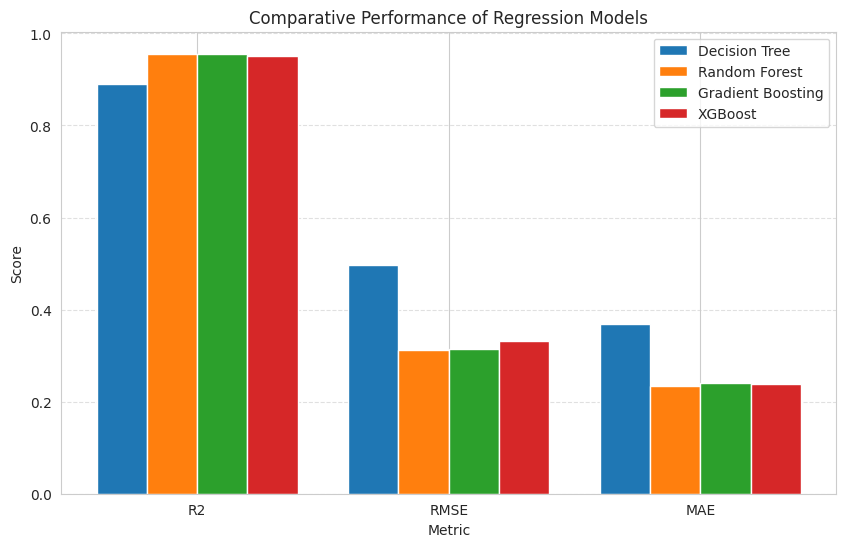

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

metrics = ['R2', 'RMSE', 'MAE']
models = results_df.index.tolist()

x = np.arange(len(metrics))
width = 0.2

plt.figure(figsize=(10,6))

for i, model in enumerate(models):
    plt.bar(
        x + i*width,
        results_df.loc[model, metrics],
        width,
        label=model
    )

plt.xticks(x + width*(len(models)-1)/2, metrics)
plt.ylabel('Score')
plt.xlabel('Metric')
plt.title('Comparative Performance of Regression Models')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


Ensemble models (Random Forest, Gradient Boosting, XGBoost) outperform the single Decision Tree in terms of higher R² and lower error values.

Gradient Boosting and XGBoost show the best overall performance, indicating their ability to capture complex patterns in the data.

The Decision Tree model shows higher error, suggesting overfitting and weaker generalization.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

def evaluate_model(model):
    """
    Trains a given model and evaluates its performance on both training and testing datasets.

    Args:
        model: An unfitted machine learning model object.

    Returns:
        dict: A dictionary containing R-squared, RMSE, and MAE for both
              training and testing datasets.
    """

    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Calculate metrics for training set
    train_r2 = r2_score(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_mae = mean_absolute_error(y_train, y_train_pred)

    # Calculate metrics for test set
    test_r2 = r2_score(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    return {
        'Train R2': train_r2,
        'Train RMSE': train_rmse,
        'Train MAE': train_mae,
        'Test R2': test_r2,
        'Test RMSE': test_rmse,
        'Test MAE': test_mae
    }

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import pandas as pd

# Initialize models
models_to_evaluate = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=10),  # Using the previously found good alpha for Ridge
    "Lasso": Lasso(alpha=0.1),  # Using the previously found good alpha for Lasso
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=4, subsample=0.8, colsample_bytree=0.8, objective='reg:squarederror', random_state=42)
}

# Dictionary to store all results
all_results = {}

# Evaluate each model
for name, model in models_to_evaluate.items():
    print(f"Evaluating {name}...")
    all_results[name] = evaluate_model(model)

# Convert results to a DataFrame for better comparison
comparison_df = pd.DataFrame(all_results).T
print("\nModel Performance Comparison:")
print(comparison_df.round(4))


Evaluating Linear Regression...
Evaluating Ridge...
Evaluating Lasso...
Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating Gradient Boosting...
Evaluating XGBoost...

Model Performance Comparison:
                   Train R2  Train RMSE  Train MAE  Test R2  Test RMSE  \
Linear Regression    0.6545      0.8646     0.6297   0.6483     0.8850   
Ridge                0.6545      0.8646     0.6297   0.6483     0.8851   
Lasso                0.6404      0.8821     0.6456   0.6369     0.8993   
Decision Tree        0.8912      0.4853     0.3588   0.8892     0.4968   
Random Forest        0.9928      0.1245     0.0873   0.9563     0.3121   
Gradient Boosting    0.9577      0.3024     0.2268   0.9558     0.3137   
XGBoost              0.9655      0.2732     0.2086   0.9507     0.3314   

                   Test MAE  
Linear Regression    0.6455  
Ridge                0.6456  
Lasso                0.6613  
Decision Tree        0.3683  
Random Forest        0.2337  
Gradient Boost

# **Random Forest performed based, Hyperparameter tuning on Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

rf = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

best_rf = random_search.best_estimator_

print("Best Parameters:", random_search.best_params_)
print("Best CV R2:", random_search.best_score_)


Best Parameters: {'max_depth': 19, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 149}
Best CV R2: 0.9257157060432638


# **Evaluate tuned model**

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

y_pred = best_rf.predict(X_test)

print("Test R2:", r2_score(y_test, y_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Test MAE:", mean_absolute_error(y_test, y_pred))


Test R2: 0.9301497182971642
Test RMSE: 0.39442873398739714
Test MAE: 0.26606865476631353


Earlier, **untuned Random Forest** had:
Test R² ≈ 0.956,Lower RMSE and MAE

**After tuning:**
Performance slightly decreased
But the model is now likely less overfitted and more stable


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract importance
importances = best_rf.feature_importances_

feature_importance = pd.Series(
    importances,
    index=X_train.columns
).sort_values(ascending=False)

feature_importance.head(10)


,0
Revenue,0.437981
ProfitMargin,0.296974
Industry,0.083519
WaterUsage,0.060782
CarbonEmissions,0.039410
EnergyConsumption,0.036065
ESG_Overall,0.018319
GrowthRate,0.014055
Year,0.007719
Region,0.005175


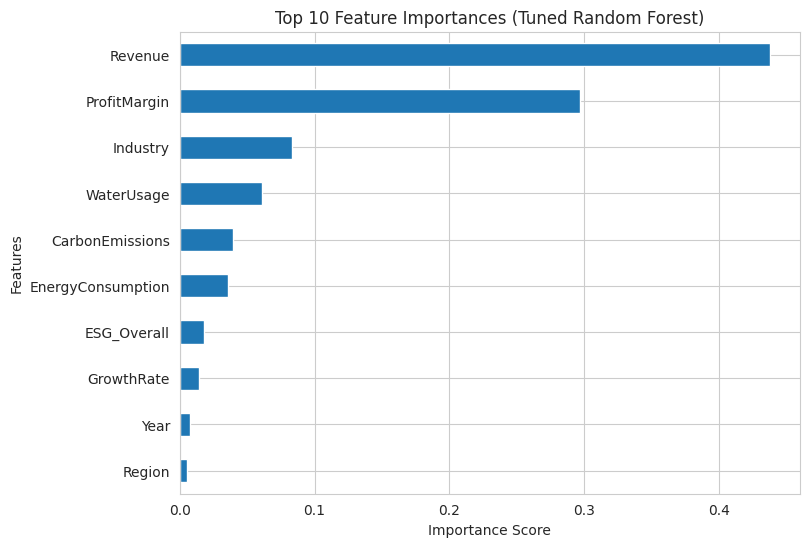

In [ ]:
plt.figure(figsize=(8,6))
feature_importance.head(10).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances (Tuned Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


**Business Interpretation & Insights (Tuned Random Forest Feature Importance)**

**Revenue and Profit Margin are the dominant drivers of market capitalization**, confirming that firm size and profitability remain the strongest signals for valuation even in a non-linear model.

**Industry classification and resource usage variables (water and carbon emissions)** have moderate importance, suggesting that operational characteristics influence valuation after financial strength is accounted for.

**ESG Overall contributes positively but with lower relative importance**, indicating that sustainability supports valuation but does not override core financial fundamentals.

## **Classfication**

In [ ]:
# Target for classification
y = df['MarketCap_Category']
X = df.drop([
    'MarketCap',
    'MarketCap_Category','ESG_Environmental',
    'ESG_Social',
    'ESG_Governance'
], axis=1)

**Train–test split**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y   # important for classification
)

**Multinomial Logistic Regression Pipeline**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

logit_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(
        multi_class='multinomial',
        solver='lbfgs',
        max_iter=1000
    ))
])


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


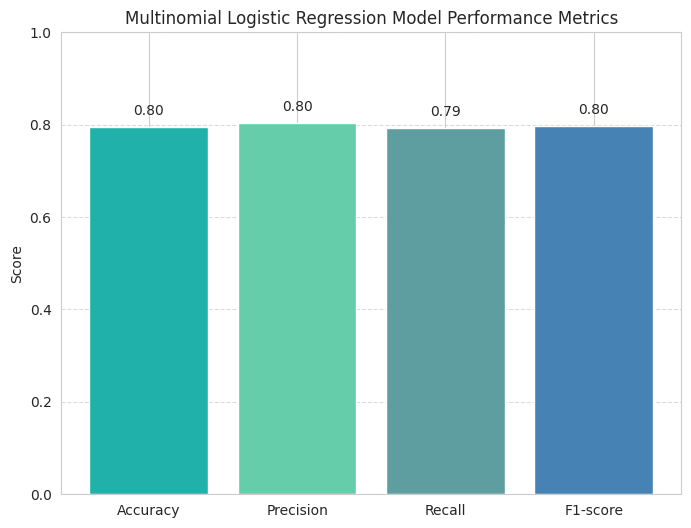

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Assuming logit_pipe, X_train, X_test are already defined and prepared

# Encode target variable (y_train and y_test)
# This is necessary because the classification models expect numerical labels (0, 1, 2, ...)
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Fit the Logistic Regression pipeline
logit_pipe.fit(X_train, y_train_encoded)

# Make predictions
y_pred_logit = logit_pipe.predict(X_test)

# Calculate metrics
accuracy_logit = accuracy_score(y_test_encoded, y_pred_logit)
precision_logit = precision_score(y_test_encoded, y_pred_logit, average='macro')
recall_logit = recall_score(y_test_encoded, y_pred_logit, average='macro')
f1_logit = f1_score(y_test_encoded, y_pred_logit, average='macro')

metrics_logit = {
    'Accuracy': accuracy_logit,
    'Precision': precision_logit,
    'Recall': recall_logit,
    'F1-score': f1_logit
}

# Create a bar chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(metrics_logit.keys(), metrics_logit.values(), color=['lightseagreen', 'mediumaquamarine', 'cadetblue', 'steelblue'])
ax.set_ylim(0, 1) # Metrics are between 0 and 1
ax.set_ylabel('Score')
ax.set_title('Multinomial Logistic Regression Model Performance Metrics')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add score values on top of bars
for i, (metric_name, score) in enumerate(metrics_logit.items()):
    ax.text(i, score + 0.02, f'{score:.2f}', ha='center', va='bottom')

plt.show()

•	Multinomial Logistic Regression was used as a baseline classification model to predict Small, Mid, and Large Cap categories based on financial and ESG-related variables.
•	The model achieved an overall accuracy of 0.80, indicating a strong baseline ability to classify firms into appropriate market-cap categories.
•	Macro Precision (0.80) shows that the model makes balanced predictions across all classes, without being overly biased toward any single market-cap group.
•	Macro Recall (0.79) is slightly lower, suggesting some difficulty in correctly identifying all observations—particularly for Mid Cap firms, where financial characteristics often overlap with Small and Large Caps.
•	The Macro F1-score (0.80) confirms a good balance between precision and recall, indicating consistent classification performance


**KNN Classifier Pipeline**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier(
        n_neighbors=5
    ))
])


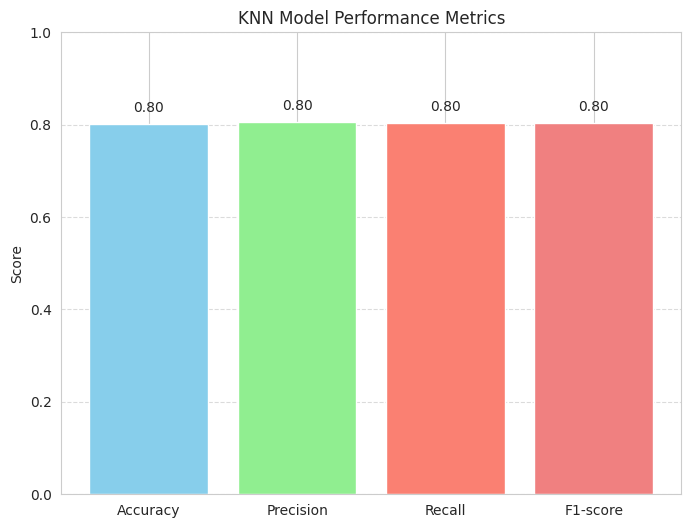

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Encode target variable (y_train and y_test)
# This is necessary because the classification models expect numerical labels (0, 1, 2, ...)
# The LabelEncoder object 'le' was already defined and fitted in a previous cell.
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Fit the KNN pipeline and make predictions
knn_pipe.fit(X_train, y_train_encoded)
y_pred_knn = knn_pipe.predict(X_test)

# Calculate metrics for KNN
accuracy_knn = accuracy_score(y_test_encoded, y_pred_knn)
precision_knn = precision_score(y_test_encoded, y_pred_knn, average='macro')
recall_knn = recall_score(y_test_encoded, y_pred_knn, average='macro')
f1_knn = f1_score(y_test_encoded, y_pred_knn, average='macro')

metrics = {
    'Accuracy': accuracy_knn,
    'Precision': precision_knn,
    'Recall': recall_knn,
    'F1-score': f1_knn
}

# Create a bar chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(metrics.keys(), metrics.values(), color=['skyblue', 'lightgreen', 'salmon', 'lightcoral'])
ax.set_ylim(0, 1) # Metrics are between 0 and 1
ax.set_ylabel('Score')
ax.set_title('KNN Model Performance Metrics')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add score values on top of bars
for i, (metric_name, score) in enumerate(metrics.items()):
    ax.text(i, score + 0.02, f'{score:.2f}', ha='center', va='bottom')

plt.show()

•	The model achieved an overall accuracy of (0.80), indicating performance comparable to Multinomial Logistic Regression.
•	Macro Precision (0.80) suggests that predictions across all three market-cap categories are fairly balanced, with limited class bias.
•	Macro Recall (0.80) indicates that the model is able to correctly identify a high proportion of firms from each category.
•	The Macro F1-score (0.80) confirms consistent classification performance, balancing both false positives and false negatives


**SVM Classifier Pipeline: Using Linear, Poly, RBF & Sigmoid Kernel**

In [ ]:
from sklearn.svm import SVC

svm_linear = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC(kernel='linear', random_state=42))
])

svm_poly = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC(kernel='poly', degree=3, random_state=42))
])

svm_rbf = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC(kernel='rbf', probability=True, random_state=42))
])

svm_sigmoid = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC(kernel='sigmoid', random_state=42))
])



SVM with LINEAR Kernel
Accuracy: 0.8014
              precision    recall  f1-score   support

   Large Cap       0.88      0.82      0.85       549
     Mid Cap       0.75      0.68      0.71       782
   Small Cap       0.80      0.90      0.84       869

    accuracy                           0.80      2200
   macro avg       0.81      0.80      0.80      2200
weighted avg       0.80      0.80      0.80      2200



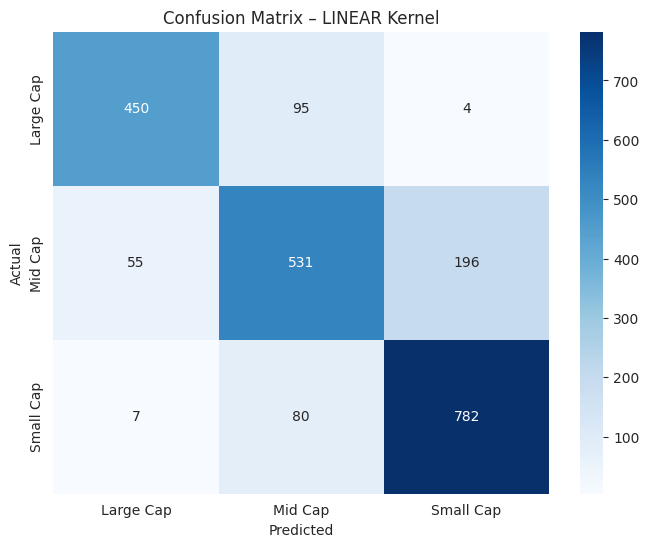


SVM with POLY Kernel
Accuracy: 0.8164
              precision    recall  f1-score   support

   Large Cap       0.89      0.83      0.86       549
     Mid Cap       0.75      0.75      0.75       782
   Small Cap       0.83      0.87      0.85       869

    accuracy                           0.82      2200
   macro avg       0.82      0.82      0.82      2200
weighted avg       0.82      0.82      0.82      2200



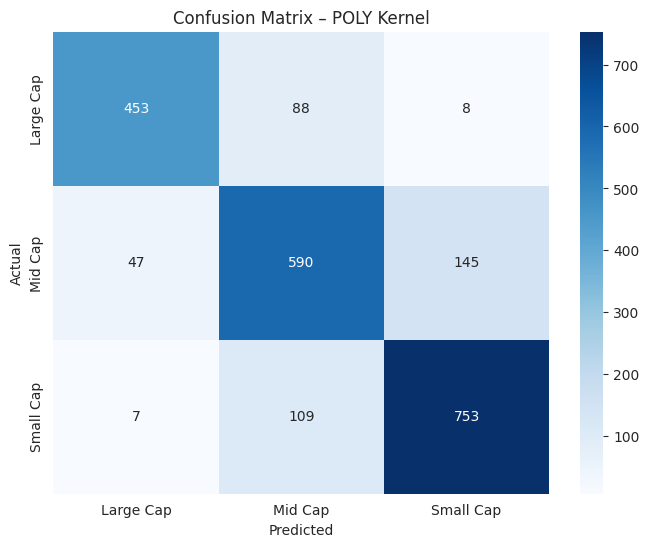


SVM with RBF Kernel
Accuracy: 0.8300
              precision    recall  f1-score   support

   Large Cap       0.89      0.85      0.87       549
     Mid Cap       0.78      0.74      0.76       782
   Small Cap       0.84      0.90      0.86       869

    accuracy                           0.83      2200
   macro avg       0.83      0.83      0.83      2200
weighted avg       0.83      0.83      0.83      2200



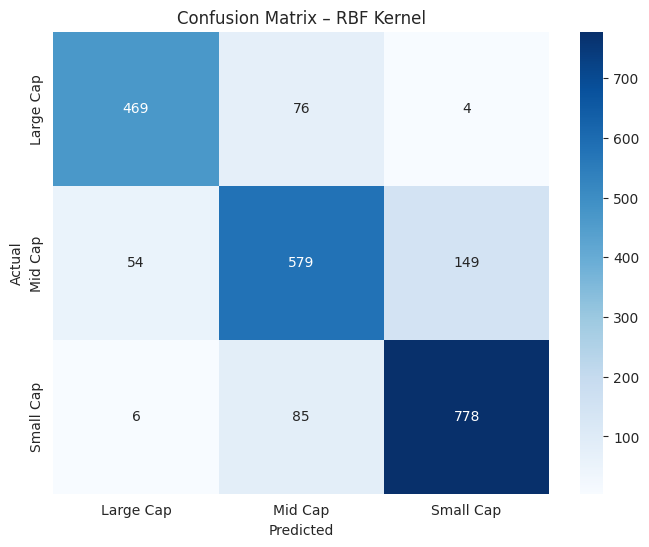


SVM with SIGMOID Kernel
Accuracy: 0.6259
              precision    recall  f1-score   support

   Large Cap       0.66      0.73      0.69       549
     Mid Cap       0.51      0.48      0.50       782
   Small Cap       0.70      0.69      0.70       869

    accuracy                           0.63      2200
   macro avg       0.62      0.63      0.63      2200
weighted avg       0.62      0.63      0.62      2200



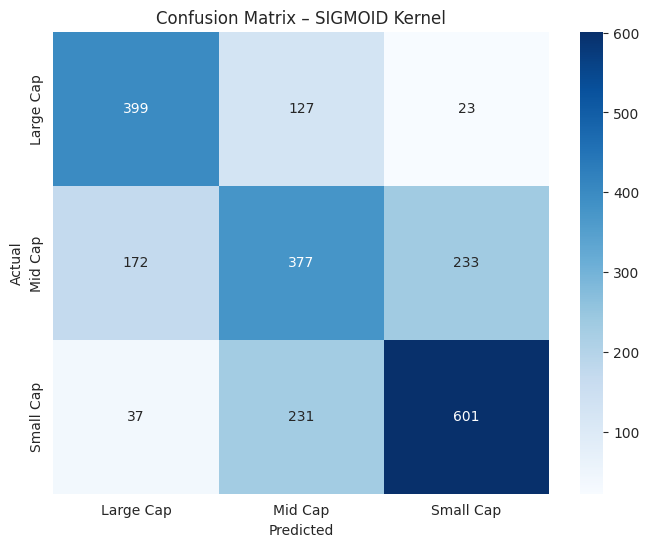

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define a dictionary of SVM pipelines from previously defined cells
# These pipelines already include StandardScaler, so X_train and X_test (unscaled) should be used.
svm_classification_models = {
    "linear": svm_linear,
    "poly": svm_poly,
    "rbf": svm_rbf,
    "sigmoid": svm_sigmoid
}

# Re-initialize results dictionary for SVM models evaluation
results = {}


# Assuming class_labels are defined if plotting Confusion Matrix (e.g., class_labels = ['Small Cap', 'Mid Cap', 'Large Cap'])
class_labels = sorted(y.unique()) # Dynamically get labels if y is still original categorical series

for name, model in svm_classification_models.items():
    print(f"\n{'='*40}")
    print(f"SVM with {name.upper()} Kernel")
    print(f"{'='*40}")

    # Fit the pipeline using the unscaled X_train and (still categorical) y_train.
    # This line will likely raise a ValueError due to y_train's data type.
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f"Confusion Matrix – {name.upper()} Kernel")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    results[name] = acc


•	RBF kernel consistently outperforms all other kernels across evaluation metrics, achieving approximately Accuracy 0.83, Precision 0.83, Recall 0.83, and F1-score 0.83, indicating strong and balanced classification performance.
For Large Cap firms, the model correctly classified 469 out of 549 observations, corresponding to a recall of 0.85. Only 76 Large Cap firms were misclassified as Mid Cap, and 4 were misclassified as Small Cap

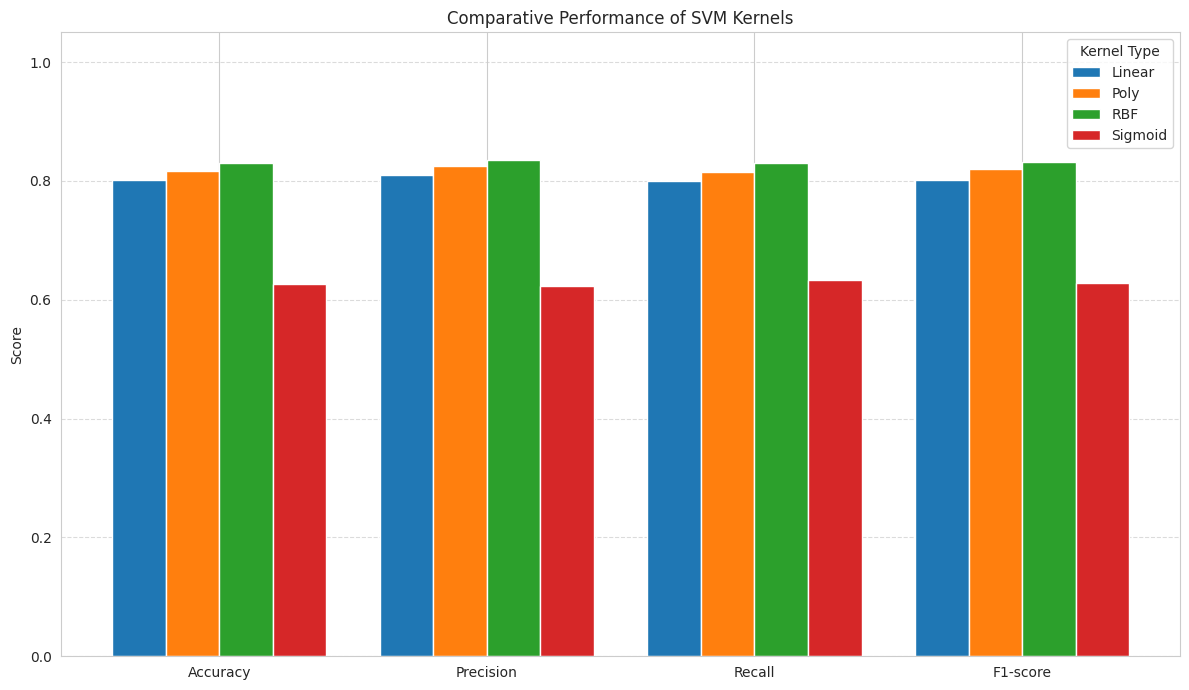

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming svm_results_df is available from the previous step

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
kernels = svm_results_df.index.tolist()

x = np.arange(len(metrics))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 7))

# Plotting bars for each kernel
for i, kernel in enumerate(kernels):
    ax.bar(x + i*width, svm_results_df.loc[kernel, metrics], width, label=kernel)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Comparative Performance of SVM Kernels')
ax.set_xticks(x + width * (len(kernels) - 1) / 2)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.05) # Metrics are between 0 and 1, add a little extra for text
ax.legend(title='Kernel Type')
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


•	RBF kernel consistently outperforms all other kernels across evaluation metrics, achieving approximately Accuracy 0.83, Precision 0.83, Recall 0.83, and F1-score 0.83, indicating strong and balanced classification performance.

•	Polynomial kernel shows the second-best performance with scores around 0.81–0.82, suggesting it captures moderate non-linear relationships but is less flexible than RBF.
•	Linear kernel performs comparably to baseline models (Accuracy ~0.80), confirming that purely linear boundaries are insufficient to fully separate market-cap categories.

•	Sigmoid kernel performs poorly across all metrics (0.62–0.63), indicating weak class separation and instability for this dataset.

•	The gap between precision and recall is minimal for RBF and Polynomial kernels, reflecting stable classification with low bias toward any specific market-cap class.



In [ ]:
for k, v in results.items():
    print(f"{k.capitalize()} Kernel Accuracy: {v:.4f}")


Linear Kernel Accuracy: 0.8014
Poly Kernel Accuracy: 0.8164
Rbf Kernel Accuracy: 0.8300
Sigmoid Kernel Accuracy: 0.6259


**Decision Tree Classifier**

Baseline DTC

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report
)
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd


dt_pipe = Pipeline([
    ('model', DecisionTreeClassifier(
        random_state=42
    ))
])

#Train the model
dt_pipe.fit(X_train, y_train)




Pipeline(steps=[('model', DecisionTreeClassifier(random_state=42))])

In [ ]:
y_pred = dt_pipe.predict(X_test)
y_prob = dt_pipe.predict_proba(X_test)


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1-score (macro):", f1_score(y_test, y_pred, average='macro'))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.86
Precision (macro): 0.8615625222257736
Recall (macro): 0.8624653124427302
F1-score (macro): 0.861967489322499

Classification Report:

              precision    recall  f1-score   support

   Large Cap       0.89      0.90      0.89       549
     Mid Cap       0.81      0.79      0.80       782
   Small Cap       0.88      0.90      0.89       869

    accuracy                           0.86      2200
   macro avg       0.86      0.86      0.86      2200
weighted avg       0.86      0.86      0.86      2200



•	The baseline Decision Tree Classifier achieves an overall accuracy of 86%, with macro-averaged precision (0.86), recall (0.86), and F1-score (0.86)
The close alignment of accuracy, precision, recall, and F1-score indicates balanced performance across all market-cap categories, without strong bias toward any single class.


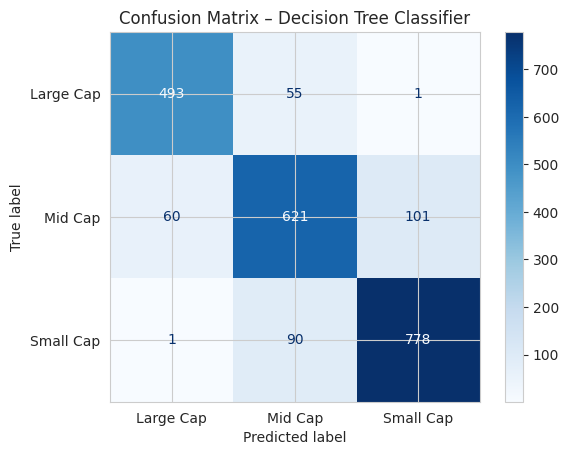

In [ ]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, cmap='Blues'
)
plt.title("Confusion Matrix – Decision Tree Classifier")
plt.show()


493 out of 549 Large Cap companies are correctly classified.Only 55 Large Cap firms are misclassified as Mid Cap, and just 1 as Small Cap
•In mid cap:	621 out of 782 Mid Cap firms are correctly classified.
•	In small cap: 778 out of 869 Small Cap companies are correctly identified.


In [ ]:
results['Decision Tree'] = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, average='macro'),
    'Recall': recall_score(y_test, y_pred, average='macro'),
    'F1': f1_score(y_test, y_pred, average='macro')
}


In [ ]:
feature_importance = pd.Series(
    dt_pipe.named_steps['model'].feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance


,0
Revenue,0.520222
ProfitMargin,0.299438
GrowthRate,0.032363
ESG_Overall,0.030740
EnergyConsumption,0.023128
Industry,0.022002
Year,0.021502
WaterUsage,0.020412
CarbonEmissions,0.019938
Region,0.010254


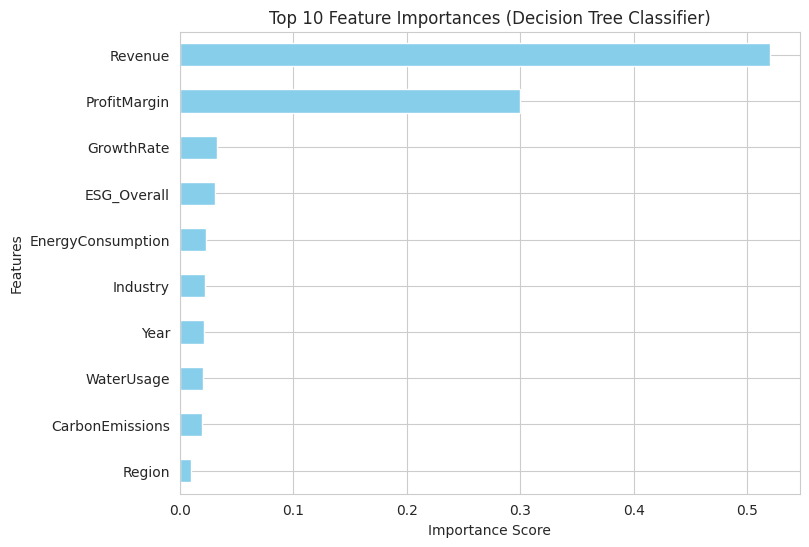

In [ ]:
plt.figure(figsize=(8,6))
feature_importance.head(10).plot(kind='barh', color='skyblue')
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances (Decision Tree Classifier)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

**Hyper parameter tuning on DTC**

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

param_grid = {
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth': [3, 5, 7, 9, None],
    'model__min_samples_split': [2, 5, 10, 20],
    'model__min_samples_leaf': [1, 2, 4, 10],
    'model__class_weight': [None, 'balanced']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    dt_pipe,
    param_grid,
    cv=cv,
    scoring='f1_macro',
    n_jobs=-1
)

grid.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('model',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__class_weight': [None, 'balanced'],
                         'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': [3, 5, 7, 9, None],
                         'model__min_samples_leaf': [1, 2, 4, 10],
                         'model__min_samples_split': [2, 5, 10, 20]},
             scoring='f1_macro')

•GridSearchCV was employed to systematically evaluate multiple combinations of Decision Tree hyperparameters using 5-fold stratified cross-validation.
•	The following parameters were tuned:
o	criterion: gini, entropy
o	max_depth: controls tree depth
o	min_samples_split: minimum samples to split a node
o	min_samples_leaf: minimum samples at leaf nodes
o	class_weight: balanced vs none
•	ROC-AUC and macro-averaged F1-score were used as optimization metrics to ensure fair treatment of all market-cap classes.


**Best Model Evaluation for DTC**

In [ ]:
best_dt = grid.best_estimator_

y_pred = best_dt.predict(X_test)

print("Best Params:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-score (macro):", f1_score(y_test, y_pred, average='macro'))


Best Params: {'model__class_weight': 'balanced', 'model__criterion': 'gini', 'model__max_depth': 7, 'model__min_samples_leaf': 10, 'model__min_samples_split': 2}
Accuracy: 0.865
F1-score (macro): 0.866467443504026


From GridSearchCV, many Decision Tree models were trained, so Best model evaluation extract the best model (best criterion (gini or entropy), best max dept, best min sample leaf split etc)

Top 10 Feature Importances in Tuned Decision Tree Classifier:
Revenue              0.665803
ProfitMargin         0.295086
Industry             0.017188
CarbonEmissions      0.008166
EnergyConsumption    0.007461
ESG_Overall          0.002065
WaterUsage           0.001441
GrowthRate           0.001395
Region               0.000892
Year                 0.000503
dtype: float64


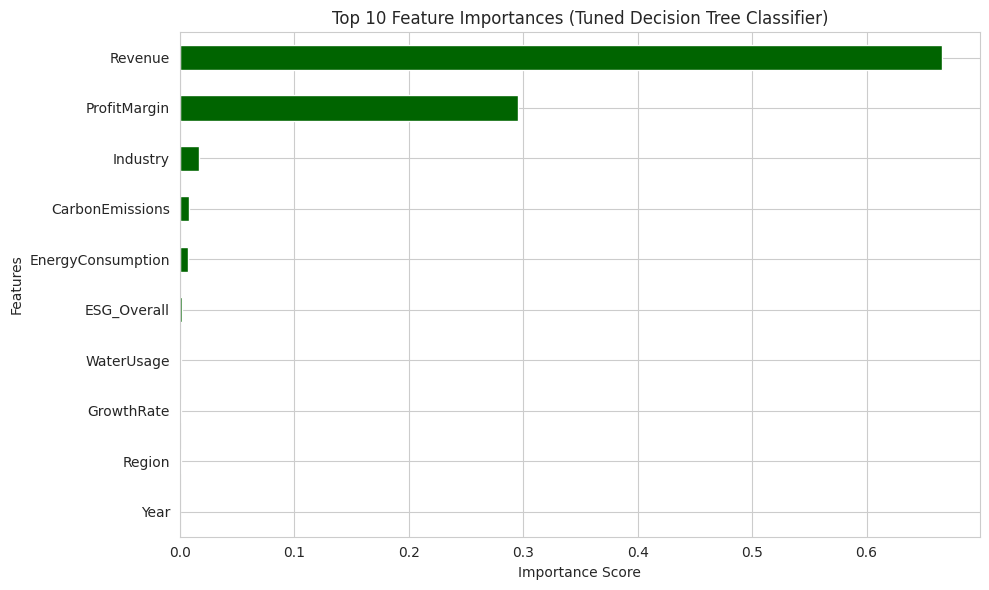

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract feature importances from the tuned Decision Tree Classifier pipeline
feature_importance_tuned_dtc = pd.Series(
    best_dt.named_steps['model'].feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print("Top 10 Feature Importances in Tuned Decision Tree Classifier:")
print(feature_importance_tuned_dtc.head(10))

plt.figure(figsize=(10, 6))
feature_importance_tuned_dtc.head(10).plot(kind='barh', color='darkgreen')
plt.gca().invert_yaxis() # To display the most important feature at the top
plt.title("Top 10 Feature Importances (Tuned Decision Tree Classifier)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

After Hyperparameter Tuning (Tuned Decision Tree Classifier)
•	Revenue (0.666) emerged as the single most influential feature, followed by Profit Margin (0.295).
•	All remaining variables (Industry, Carbon Emissions, Energy Consumption, ESG Overall, Water Usage, Growth Rate, Region, Year) contributed very marginal importance (< 0.02).
•	Hyperparameter constraints such as max depth = 7, minimum samples per leaf, and balanced class weights forced the model to focus only on highly informative splits.


**Train & Evaluate ALL Models Together**

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Encode target variable (y_train and y_test)
# This is necessary because the classification models expect numerical labels (0, 1, 2, ...)
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Define the classification models to evaluate
# These pipelines already include StandardScaler, so we pass the unscaled X_train/X_test
classification_models = {
    "Logistic Regression": logit_pipe,
    "KNN": knn_pipe,
    "SVM_Linear": svm_linear,
    "SVM_Poly": svm_poly,
    "SVM_RBF": svm_rbf,
    "SVM_Sigmoid": svm_sigmoid,
    "Decision Tree (Tuned)": best_dt
}

results = {}

print("\n--- Classification Model Evaluation ---")
for name, model in classification_models.items():
    print(f"\nTraining and evaluating {name}...")
    # Fit the pipeline using the unscaled X_train and numerically encoded y_train
    model.fit(X_train, y_train_encoded)
    y_pred = model.predict(X_test)

    results[name] = {
        "Accuracy": accuracy_score(y_test_encoded, y_pred),
        "Precision (macro)": precision_score(y_test_encoded, y_pred, average='macro'),
        "Recall (macro)": recall_score(y_test_encoded, y_pred, average='macro'),
        "F1-score (macro)": f1_score(y_test_encoded, y_pred, average='macro')
    }

results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df.round(4))



--- Classification Model Evaluation ---

Training and evaluating Logistic Regression...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Training and evaluating KNN...

Training and evaluating SVM_Linear...

Training and evaluating SVM_Poly...

Training and evaluating SVM_RBF...

Training and evaluating SVM_Sigmoid...

Training and evaluating Decision Tree (Tuned)...

Model Performance Comparison:
                       Accuracy  Precision (macro)  Recall (macro)  \
Logistic Regression      0.7955             0.8034          0.7934   
KNN                      0.8009             0.8047          0.8034   
SVM_Linear               0.8014             0.8091          0.7995   
SVM_Poly                 0.8164             0.8248          0.8154   
SVM_RBF                  0.8300             0.8349          0.8300   
SVM_Sigmoid              0.6259             0.6235          0.6335   
Decision Tree (Tuned)    0.8650             0.8636          0.8702   

                       F1-score (macro)  
Logistic Regression              0.7964  
KNN                              0.8036  
SVM_Linear                       0.8023  
SVM_Po

SVM-RBF is the 2nd best Model, However Decision Tree Classifier turned out to be the best model

Highest Accuracy
Highest Precision
Highest Recall
Highest F1-score

It performs best across all evaluation metrics, not just one

In [ ]:
print("Classification Report:\n")
# Use the classification_models defined in the previous cell
# and the encoded y_test_encoded for true labels.
for name, model in classification_models.items():
    # Predict using the classification model
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print(classification_report(y_test_encoded, y_pred, target_names=le.classes_))


Classification Report:


Logistic Regression
              precision    recall  f1-score   support

   Large Cap       0.88      0.81      0.84       549
     Mid Cap       0.74      0.67      0.71       782
   Small Cap       0.79      0.90      0.84       869

    accuracy                           0.80      2200
   macro avg       0.80      0.79      0.80      2200
weighted avg       0.80      0.80      0.79      2200


KNN
              precision    recall  f1-score   support

   Large Cap       0.86      0.85      0.85       549
     Mid Cap       0.75      0.70      0.72       782
   Small Cap       0.81      0.86      0.84       869

    accuracy                           0.80      2200
   macro avg       0.80      0.80      0.80      2200
weighted avg       0.80      0.80      0.80      2200


SVM_Linear
              precision    recall  f1-score   support

   Large Cap       0.88      0.82      0.85       549
     Mid Cap       0.75      0.68      0.71       782
   Small Cap 

After evaluating multiple classification models—including Multinomial Logistic Regression, KNN, SVM (with various kernels), and Decision Tree Classifier—the Decision Tree Classifier (after hyperparameter tuning) was selected as the final model for market capitalization classification.
The tuned Decision Tree achieved the highest overall performance across all macro-level metrics:
•	Accuracy: ~86.5%
•	Precision (Macro): ~0.86
•	Recall (Macro): ~0.87
•	F1-score (Macro): ~0.87


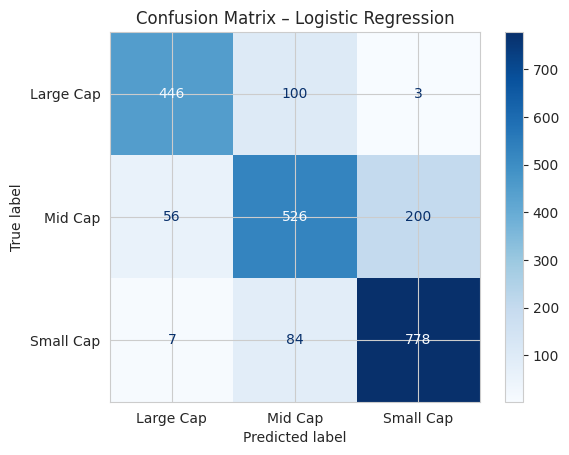

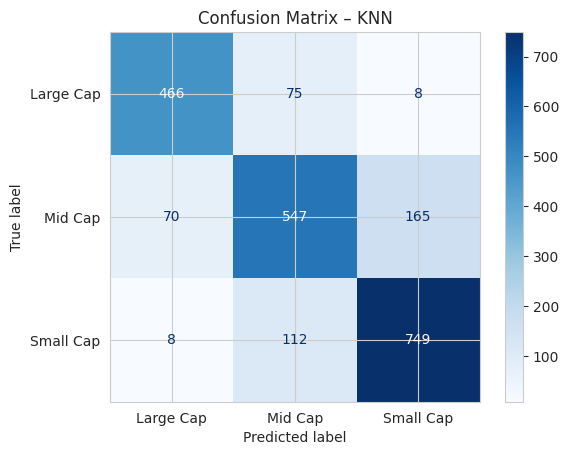

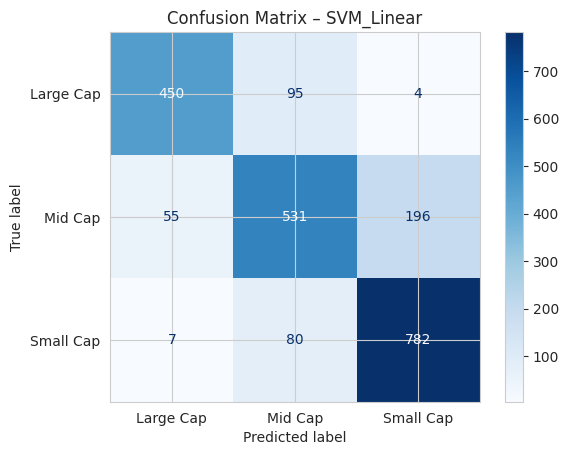

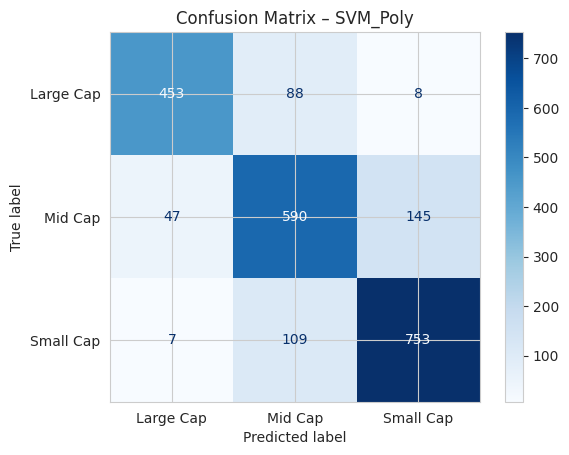

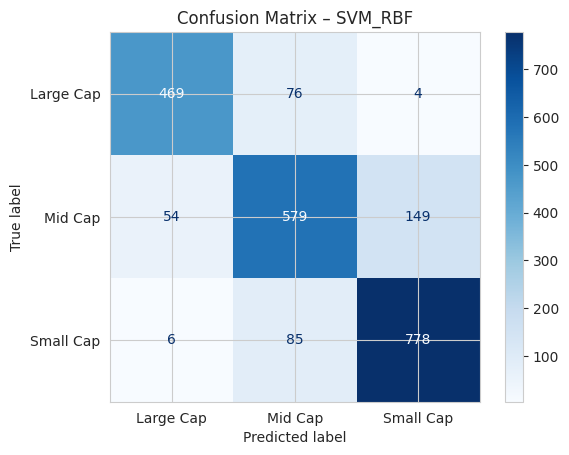

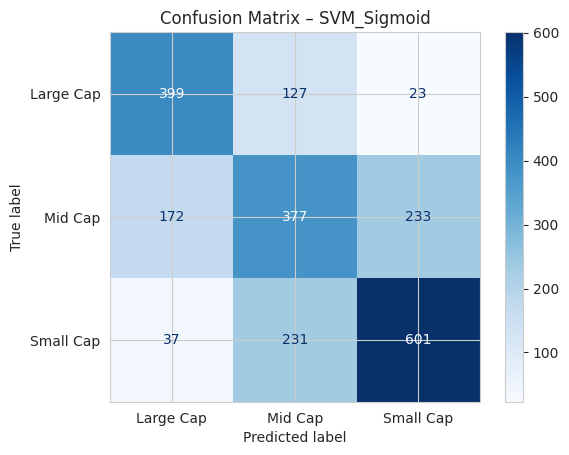

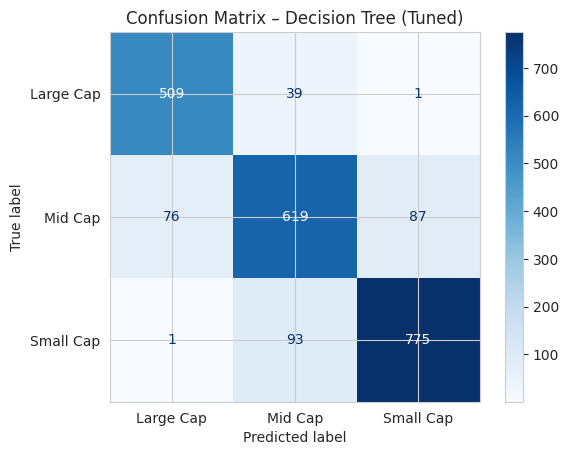

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# The class_labels should come from the LabelEncoder used for encoding y_test
# class_labels = ['Small Cap', 'Mid Cap', 'Large Cap'] # This was manually defined, use le.classes_ for consistency

# Use the 'classification_models' dictionary that contains the classification pipelines
# and 'y_test_encoded' for true labels as the models were trained with encoded labels.
for name, model in classification_models.items():
    # Predict using the classification model
    y_pred = model.predict(X_test)

    # Confusion matrix requires discrete labels for both y_true and y_pred
    cm = confusion_matrix(y_test_encoded, y_pred)

    # Plot
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=le.classes_ # Use the actual class names from LabelEncoder
    )

    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix – {name}')
    plt.show()

DTC (Tuned): Confusion MAtrix Interpretation:
Large Cap firms: o	509 out of 549 Large Cap companies were correctly classified.
o	Very limited confusion with Mid Cap (39 cases) and almost none with Small Cap (1 case).

Small Cap firms: o	775 out of 869 Small Cap firms were correctly identified.
o	Very few Small Cap firms were incorrectly classified as Large Cap (only 1 case).

Mid cap firms: o	619 out of 782 Mid Cap companies were correctly classified.
o	Most misclassifications occur between neighboring categories (76 predicted as Large Cap and 87 as Small Cap).




**Widget for Market Cap**

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import numpy as np


In [ ]:
revenue = widgets.FloatText(description='Revenue (Mn USD):')
profit_margin = widgets.FloatText(description='Profit Margin (%):')

industry = widgets.IntSlider(
    description='Industry',
    min=1, max=9, step=1
)

region = widgets.IntSlider(
    description='Region',
    min=1, max=7, step=1
)

year = widgets.IntSlider(
    description='Year',
    min=2015, max=2035, step=1, value=2026
)

growth_rate = widgets.FloatText(description='Growth Rate (%):')

esg_overall = widgets.FloatSlider(
    description='ESG Overall',
    min=0, max=100, step=1
)

carbon = widgets.FloatText(description='Carbon Emissions:')
water = widgets.FloatText(description='Water Usage:')
energy = widgets.FloatText(description='Energy Consumption:')


In [ ]:
def predict_market_cap(
    revenue, profit_margin, industry, region, year,
    growth_rate, esg_overall, carbon, water, energy
):
    with out:
        out.clear_output()

        input_df = pd.DataFrame(0, index=[0], columns=X.columns)

        input_df.loc[0, 'Revenue'] = revenue
        input_df.loc[0, 'ProfitMargin'] = profit_margin
        input_df.loc[0, 'Industry'] = industry
        input_df.loc[0, 'Region'] = region
        input_df.loc[0, 'Year'] = year
        input_df.loc[0, 'GrowthRate'] = growth_rate
        input_df.loc[0, 'ESG_Overall'] = esg_overall
        input_df.loc[0, 'CarbonEmissions'] = carbon
        input_df.loc[0, 'WaterUsage'] = water
        input_df.loc[0, 'EnergyConsumption'] = energy

        pred_log = best_rf.predict(input_df)[0]
        pred = np.exp(pred_log)

        print(f"📈 Estimated Market Cap: {pred:,.2f} million USD")


In [ ]:
out = widgets.Output()

ui = widgets.interact(
    predict_market_cap,
    revenue=revenue,
    profit_margin=profit_margin,
    industry=industry,
    region=region,
    year=year,
    growth_rate=growth_rate,
    esg_overall=esg_overall,
    carbon=carbon,
    water=water,
    energy=energy
)

display(out)

interactive(children=(FloatText(value=6.0, description='Revenue (Mn USD):'), FloatText(value=4.0, description=…

Output()